In [114]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [115]:
#displating max_rows
pd.set_option('display.max_rows',100,'display.max_columns',None)

In [116]:
#importing dataset
df=pd.read_csv('Avocado.csv')
df.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

# considering the target variable as region ,lets work on Classification problem

In [7]:
df.shape

(18249, 14)

there are 18249 rows and 14 columns in the dataset

we are able to see region,Date,type as categorical data and


In [10]:
df.Date.nunique()

169

In [117]:
df["month"] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.month

In [118]:
df["Day"] = pd.to_datetime(df.Date, format="%Y/%m/%d").dt.day

we are going to drop 'unnamed' column as it has no relation with the model,and we can drop the column Date now since we splitted the Date column to month and Day and Year column is already present in the dataset as it is unnecessary

In [119]:
#dropping 'unnamed' and 'Date' data from the dataset
df.drop(columns=["Date"],axis=1,inplace=True)

In [7]:
#updated Dataset shape
df.shape

(18249, 15)

we have 14 columns in the dataset now,the number of rows remains unchanged .

In [17]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [18]:
df['type'].nunique()

2

In [19]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [20]:
df['year'].nunique()

4

In [8]:
#lets check for duplicates in the dataset 
df.drop_duplicates(inplace=True)
df.shape

(18249, 15)

here are no duplicates in the dataset

# Missing values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
 13  month         18249 non-null  int64  
 14  Day           18249 non-null  int64  
dtypes: float64(9), int64(4), object(2)
memory usage: 2.2+ MB


In [10]:
#checking the availabel null values in the dataset 
df.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
Day             0
dtype: int64

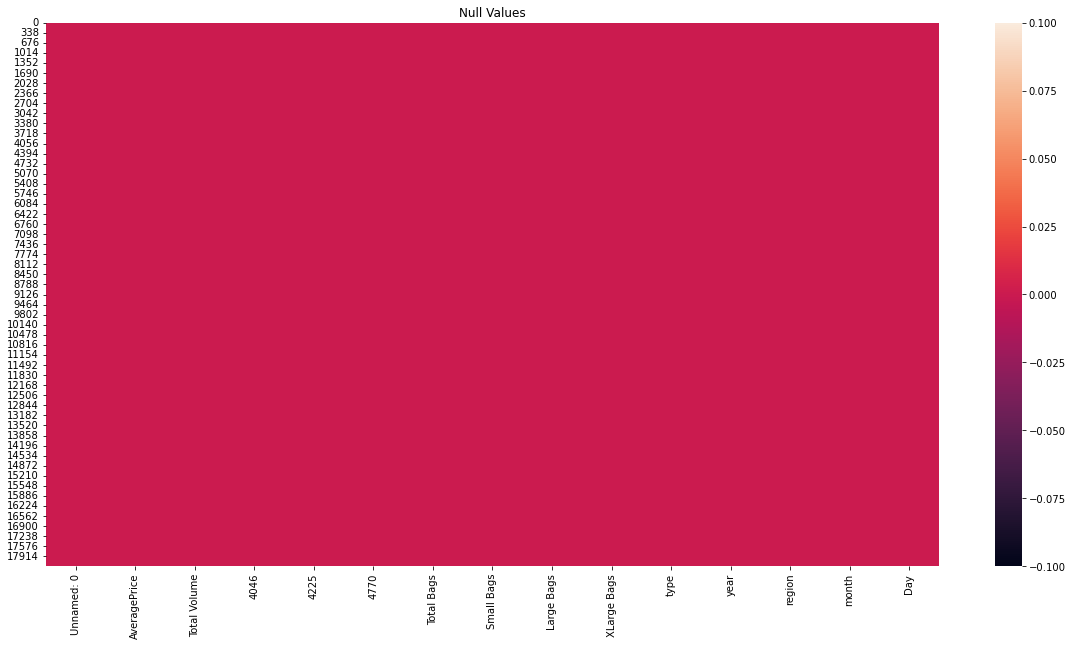

In [11]:
#heatmap on null values
plt.figure(figsize=[20,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

there are no whitespaces or null values present in the dataset so we can continue with the dataset
as we have non null values equal to same no of available rows in the dataset

# Statistics summary

In [12]:
df.describe().T

count           mean           std      min       25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.00   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   
month         18249.0       6.177215  3.534130e+00     1.00      3.00   
Day           18249.0      15.662612  8.776281e+00     1.00      8.00   

                    50%        75%          max  
Unnamed: 0        24.00      38.00        52.00  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00  
month              6.00       9.00        12.00  
Day               16.00      23.00        31.00

In [28]:
df['region'].nunique()

54

In [29]:
df['region'].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [ ]:
we are able to observe all the regions except WestTexNewMexico is of same counts

In [30]:
color_list=['green','purple','red','blue','black','Orange','violet','pink','yellow']

Text(0.5, 1.0, 'region')

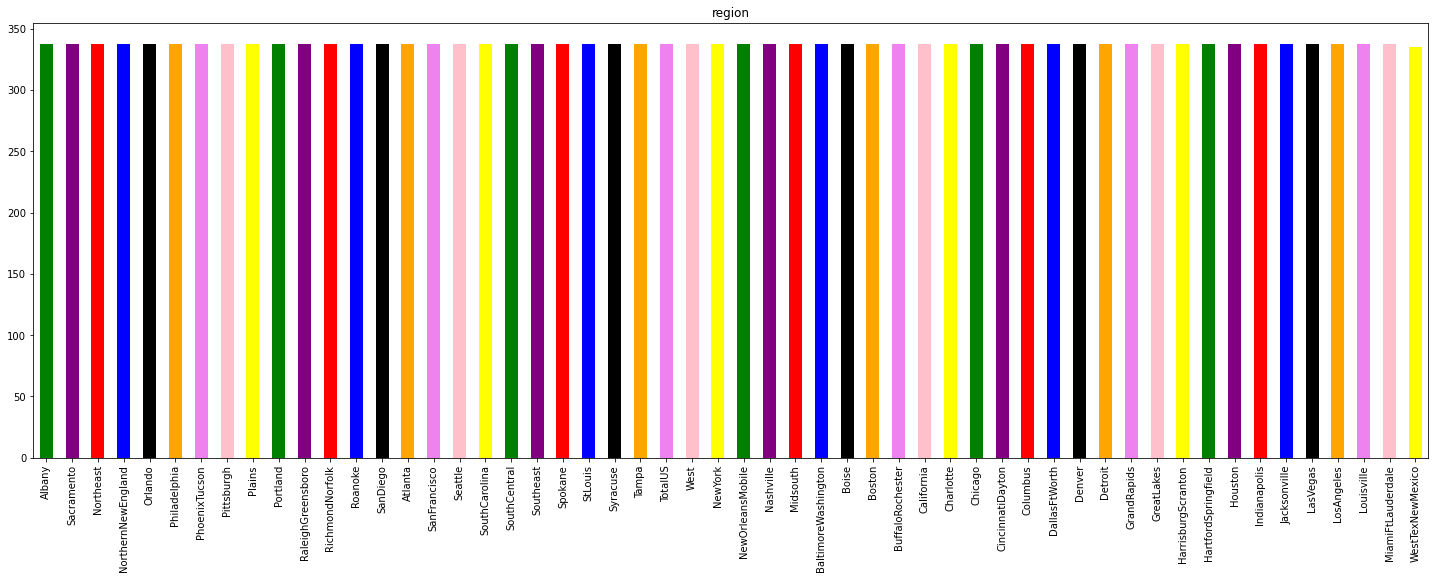

In [31]:
plt.figure(figsize=(25,8))
pd.value_counts(df.region).plot.bar(color=color_list)
plt.title("region")

<AxesSubplot:ylabel='None'>

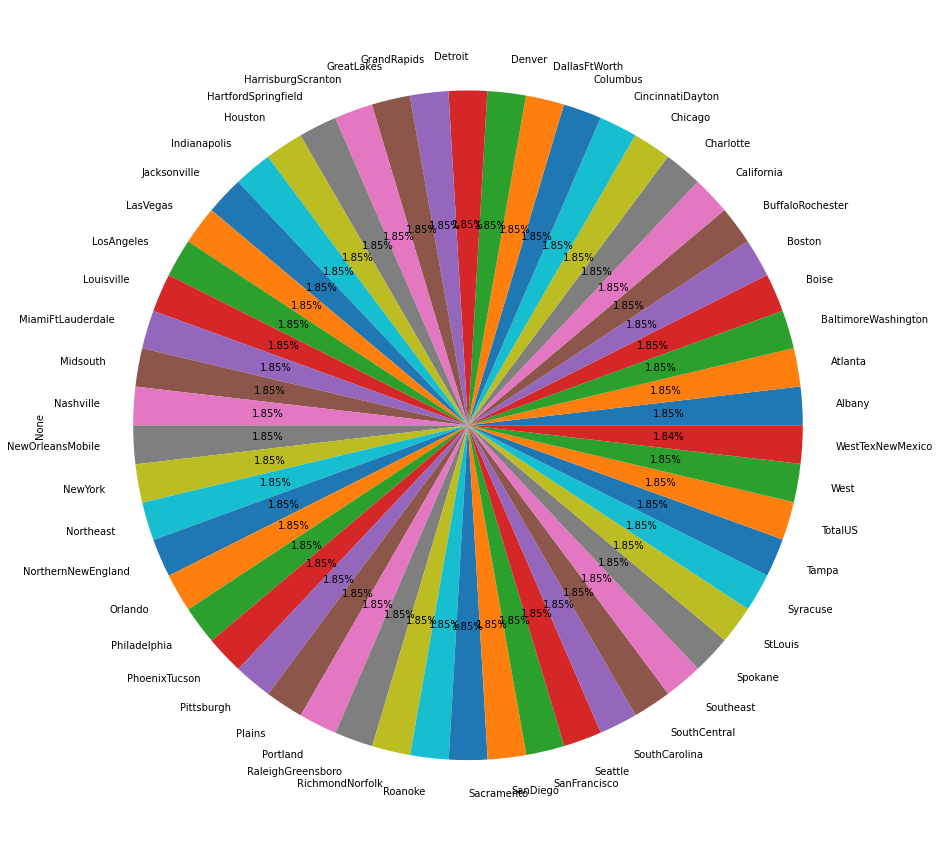

In [32]:
plt.figure(figsize=(15,25))

df.groupby("region").size().plot(kind='pie',autopct='%.2f%%')

# we can see that the dataset is balanced and so we can continue with the current format

<AxesSubplot:>

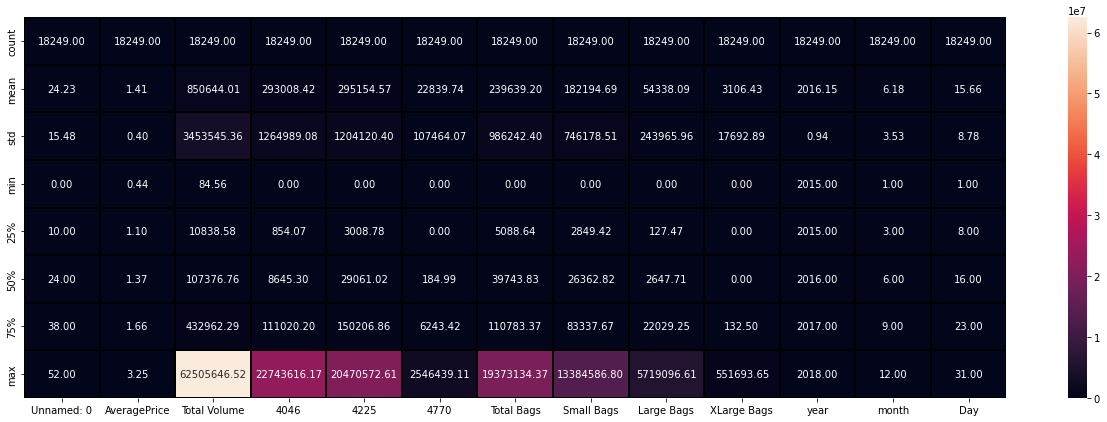

In [13]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Encoding

In [120]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [121]:
df.type=LE.fit_transform(df.type)

In [122]:
df.region=LE.fit_transform(df.region)

# Data Visualization

In [123]:
columns=df.columns

In [18]:
def hist_plt(i):
    plt.figure(figsize=(10,5))
    
    sns.histplot(x=columns[i],data=df,kde=True)

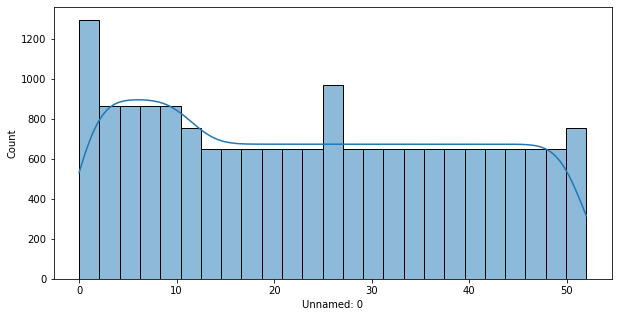

In [19]:
hist_plt(0)

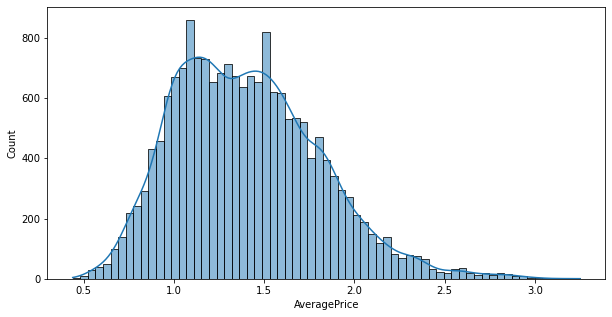

In [20]:
hist_plt(1)

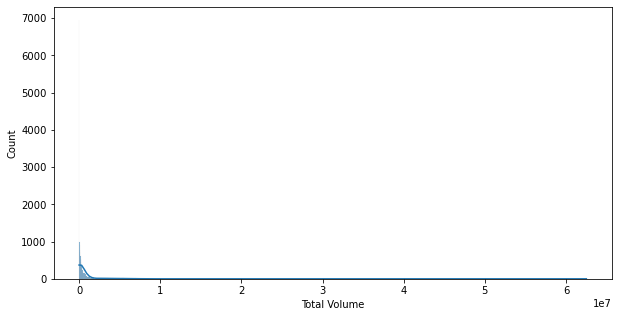

In [21]:
hist_plt(2)

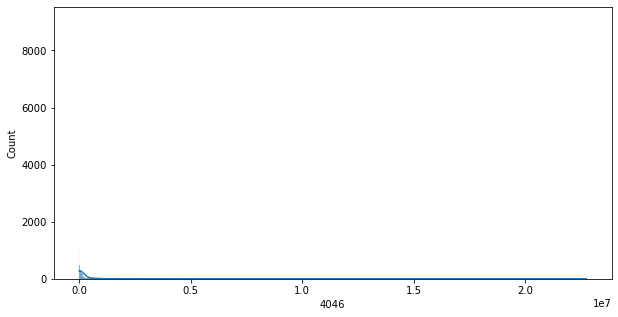

In [22]:
hist_plt(3)

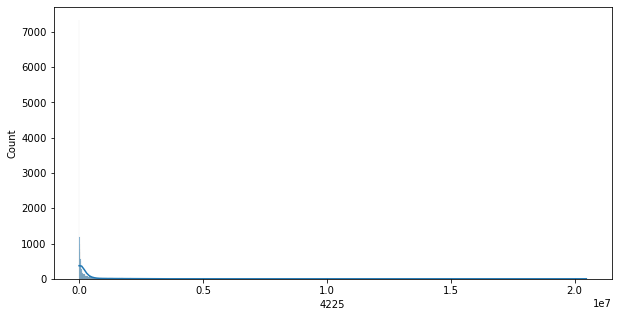

In [23]:
hist_plt(4)

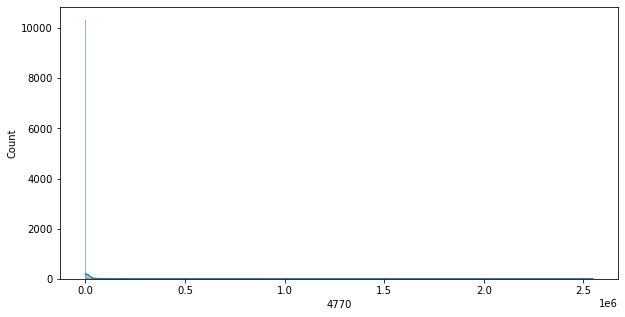

In [24]:
hist_plt(5)

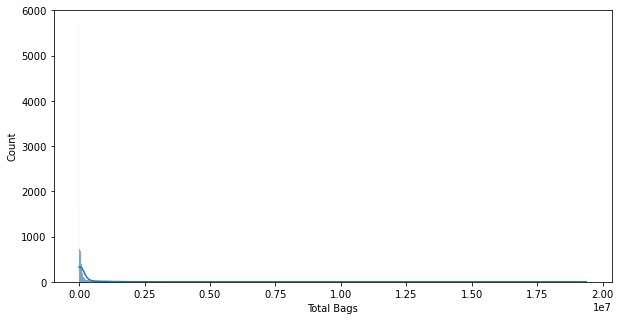

In [25]:
hist_plt(6)

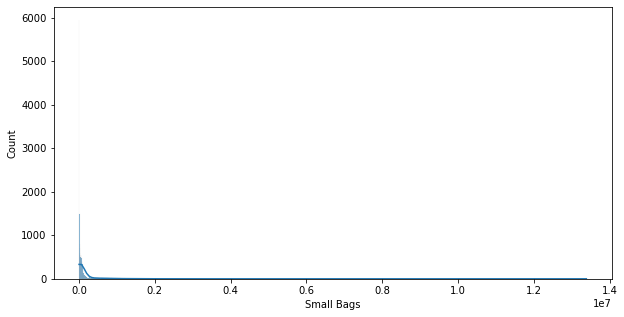

In [26]:
hist_plt(7)

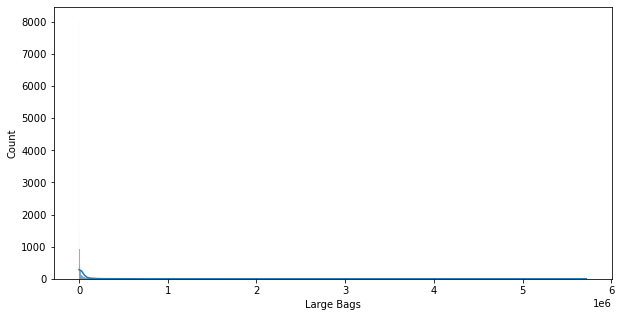

In [27]:
hist_plt(8)

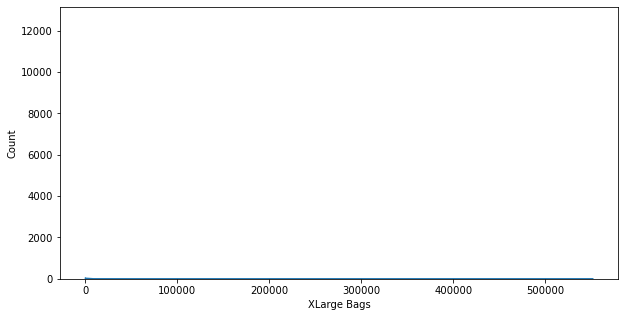

In [28]:
hist_plt(9)

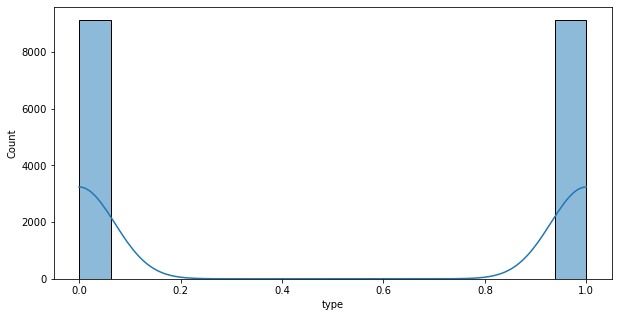

In [29]:
hist_plt(10)

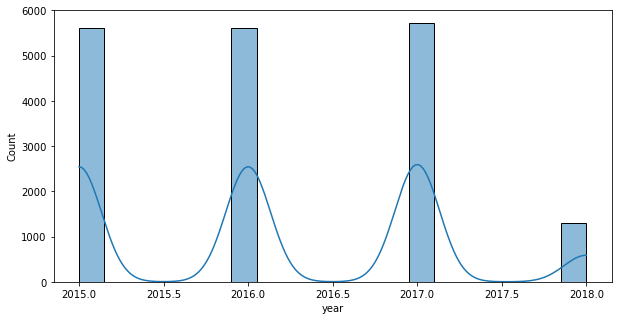

In [30]:
hist_plt(11)

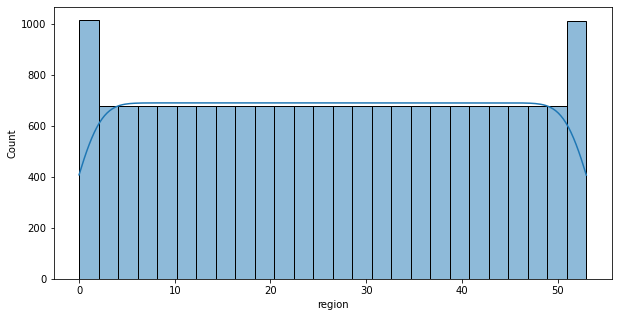

In [31]:
hist_plt(12)

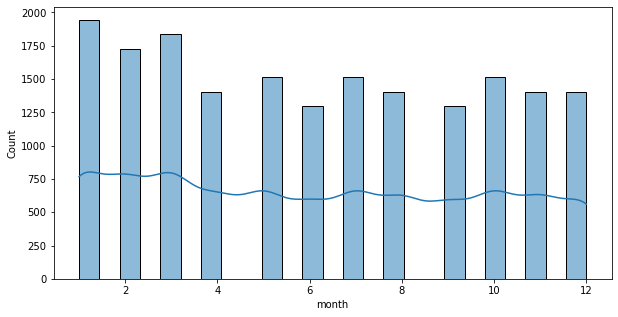

In [32]:
hist_plt(13)

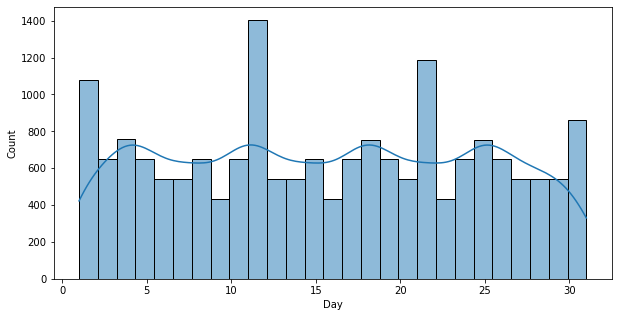

In [33]:
hist_plt(14)

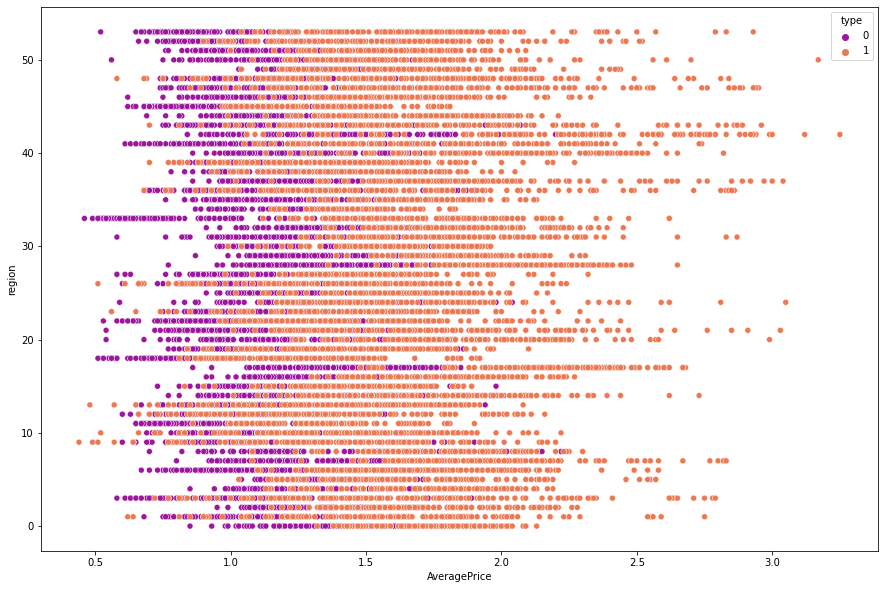

In [182]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='AveragePrice', y='region', hue='type', data=df, palette="plasma")
plt.show()

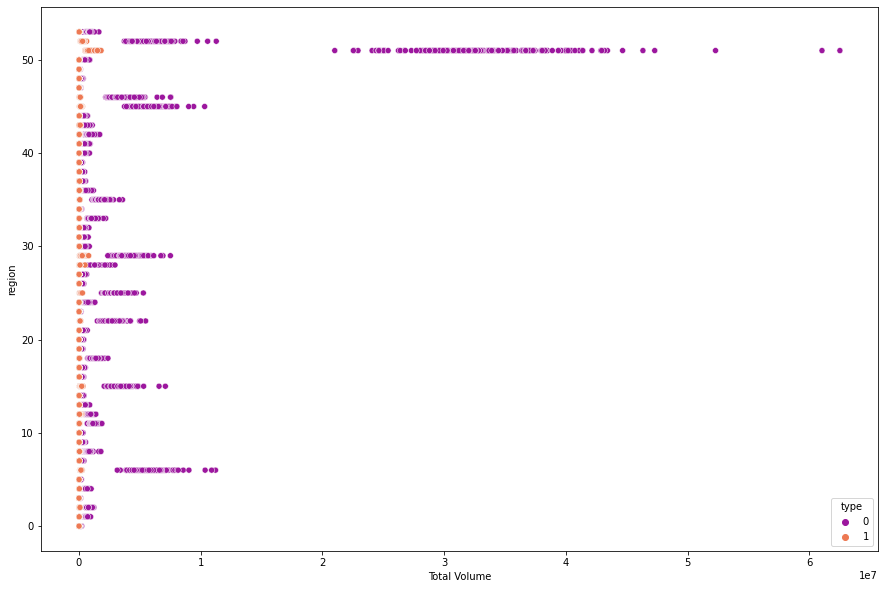

In [184]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Total Volume', y='region', hue='type', data=df, palette="plasma")
plt.show()

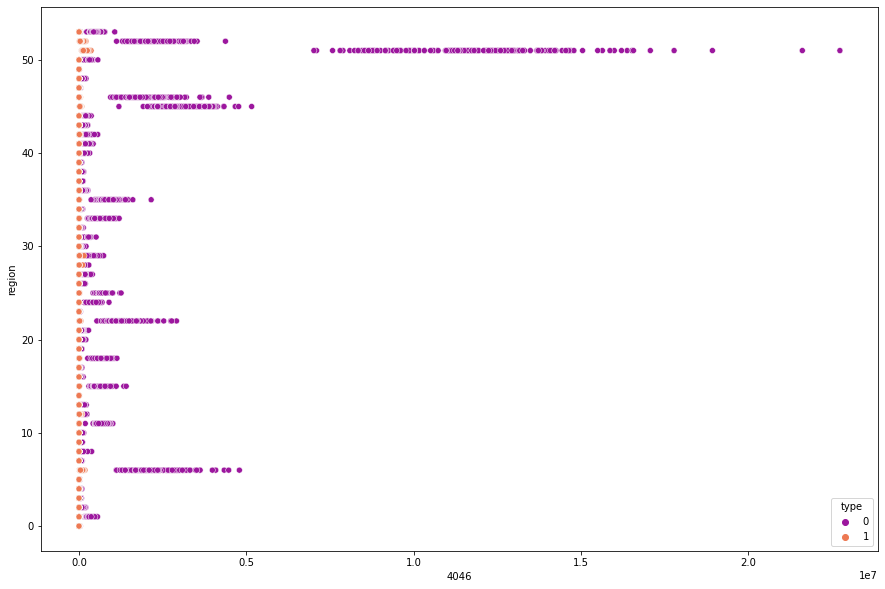

In [185]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='4046', y='region', hue='type', data=df, palette="plasma")
plt.show()

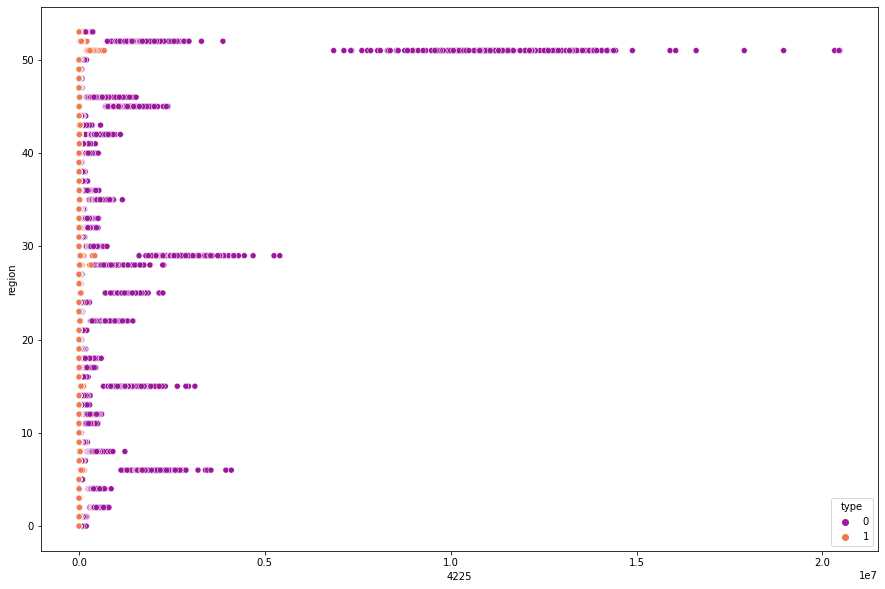

In [186]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='4225', y='region', hue='type', data=df, palette="plasma")
plt.show()

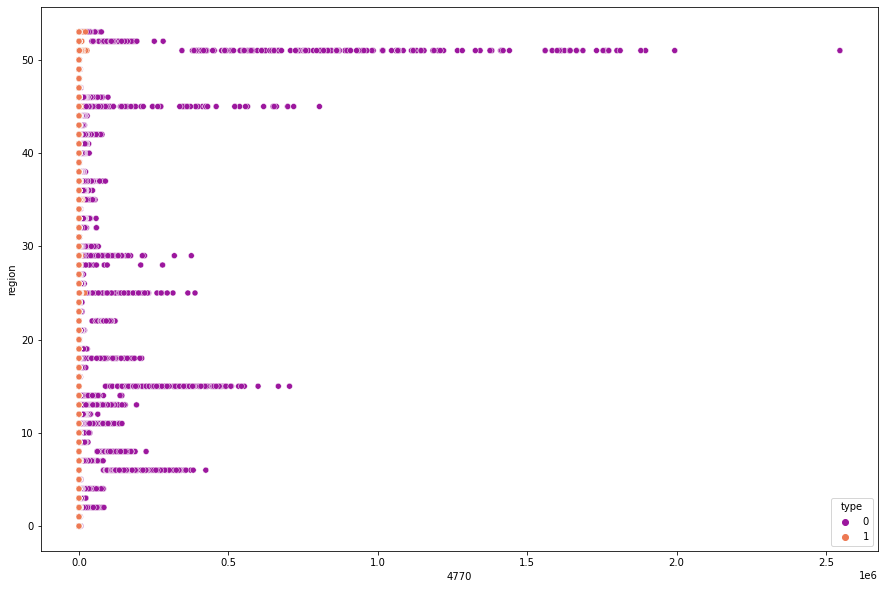

In [187]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='4770', y='region', hue='type', data=df, palette="plasma")
plt.show()

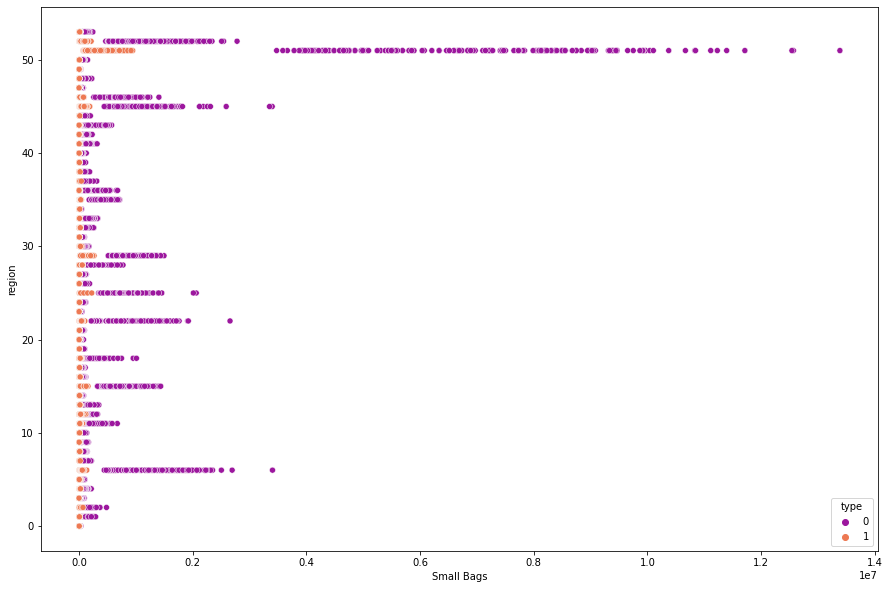

In [188]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Small Bags', y='region', hue='type', data=df, palette="plasma")
plt.show()

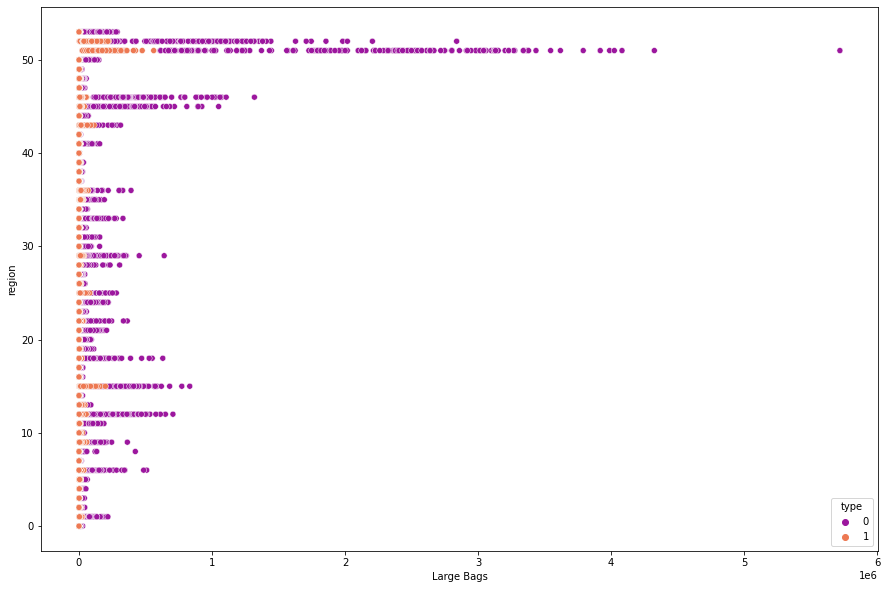

In [189]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Large Bags', y='region', hue='type', data=df, palette="plasma")
plt.show()

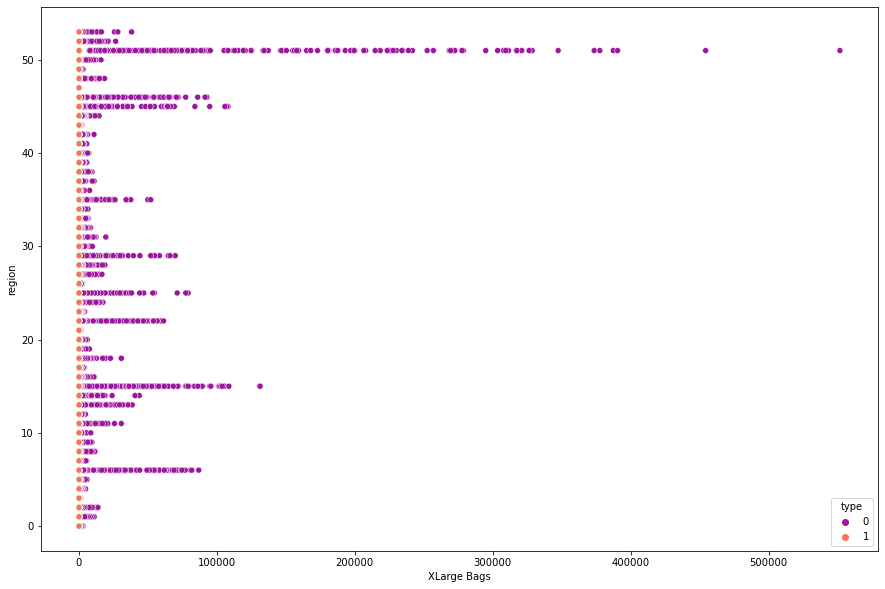

In [190]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='XLarge Bags', y='region', hue='type', data=df, palette="plasma")
plt.show()

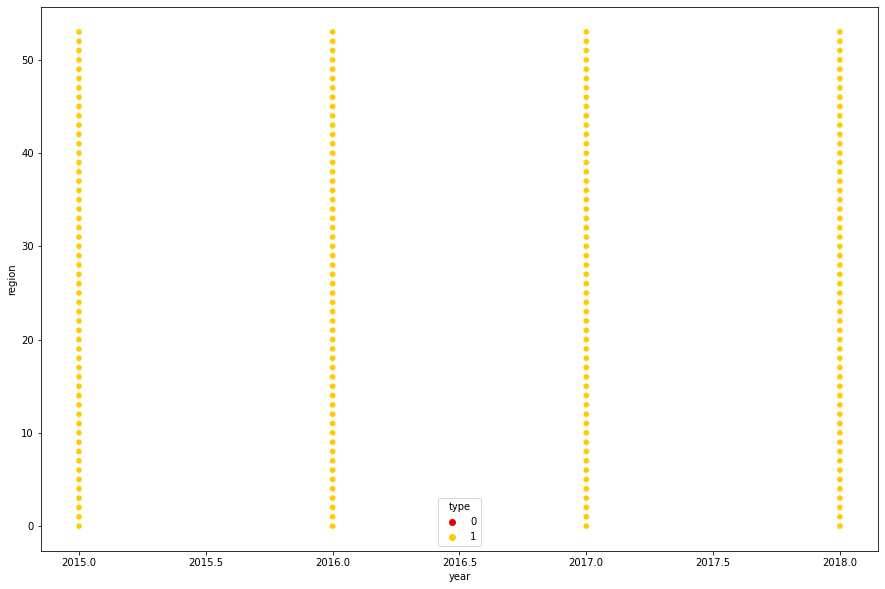

In [195]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='year', y='region', hue='type', data=df, palette="hot")
plt.show()

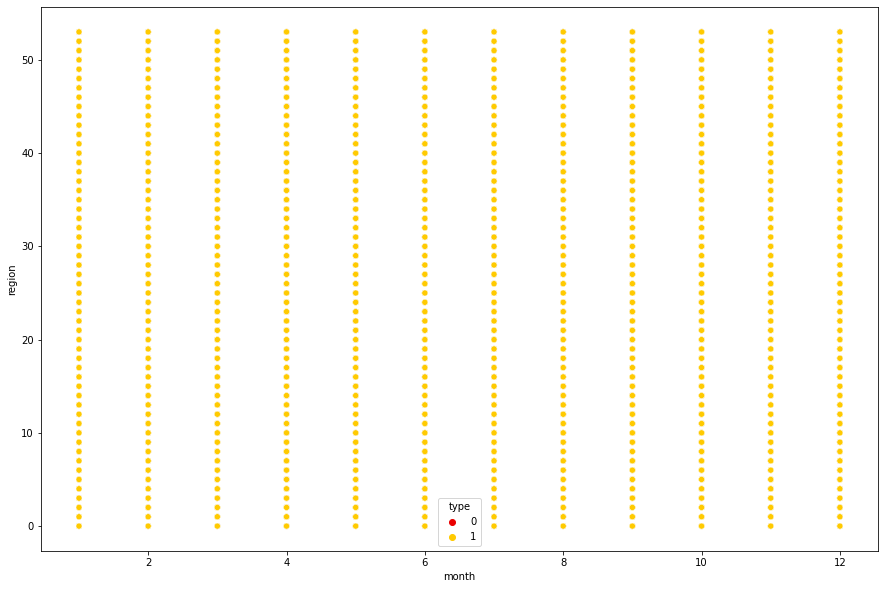

In [196]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='month', y='region', hue='type', data=df, palette="hot")
plt.show()

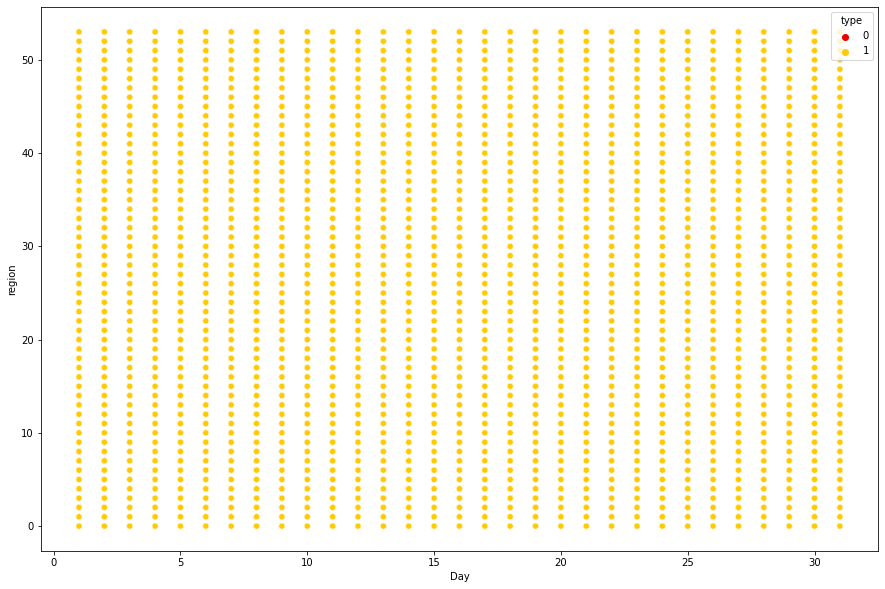

In [197]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Day', y='region', hue='type', data=df, palette="hot")
plt.show()

In [125]:
def pplot(i):
    plt.figure(figsize=(10,9))
    sns.regplot(x=columns[i],y='region',data=df)    
    plt.xlabel(columns[i])
    plt.show()

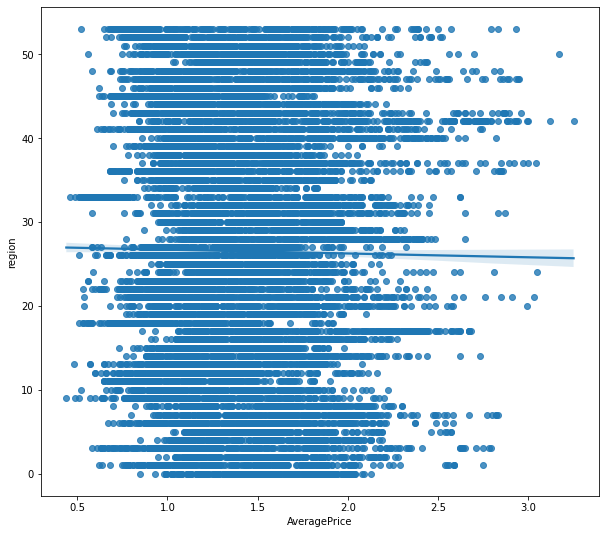

In [128]:
pplot(0)

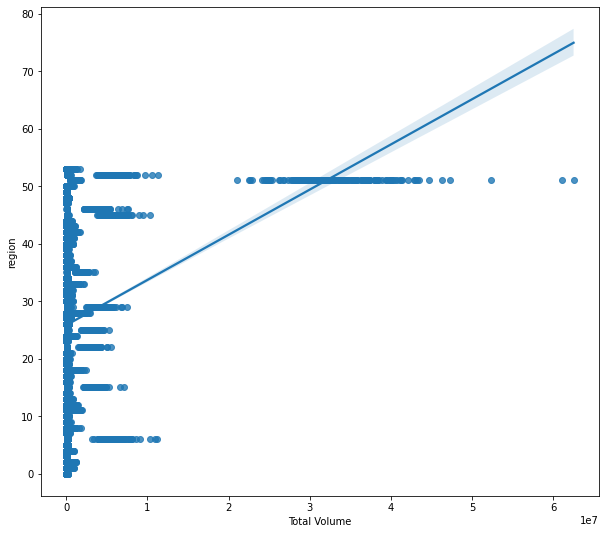

In [127]:
pplot(1)

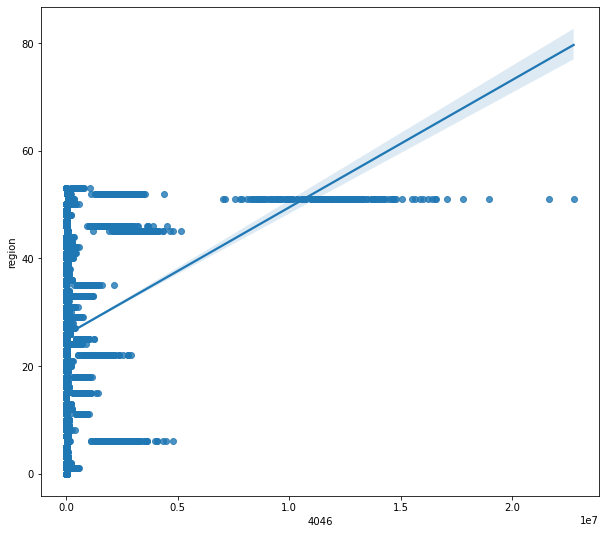

In [129]:
pplot(2)

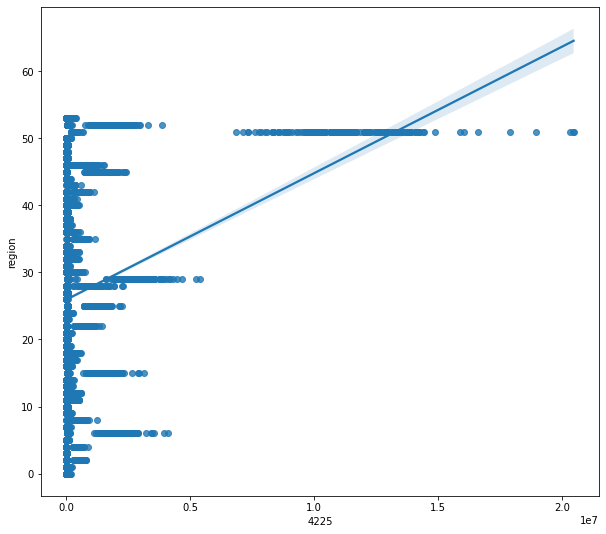

In [130]:
pplot(3)

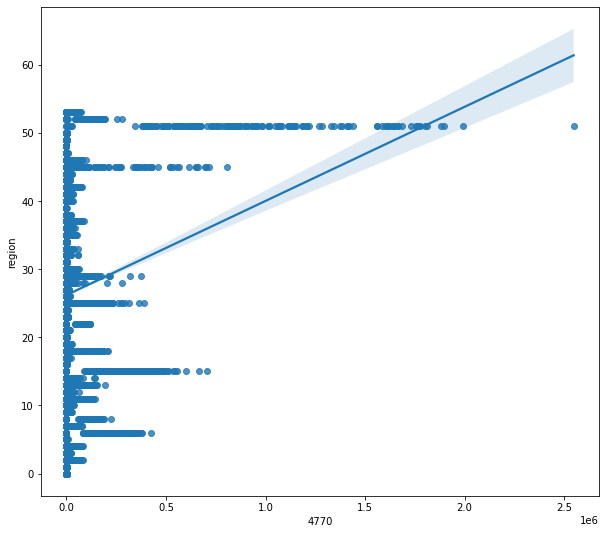

In [131]:
pplot(4)

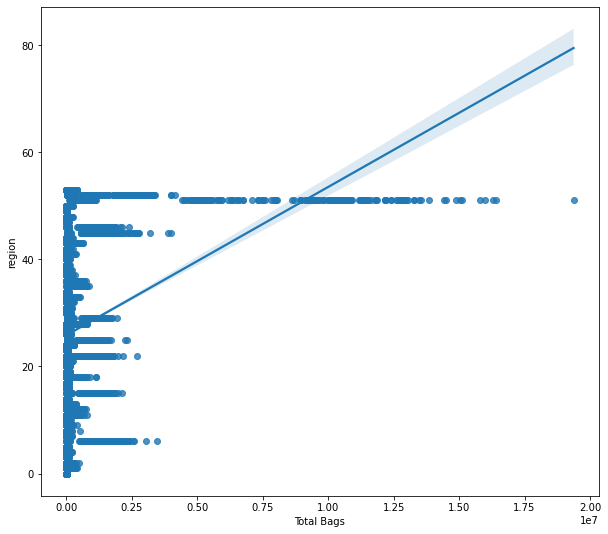

In [132]:
pplot(5)

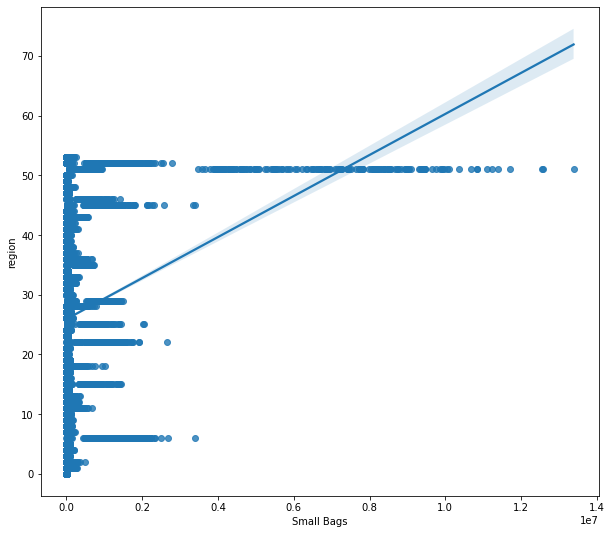

In [133]:
pplot(6)

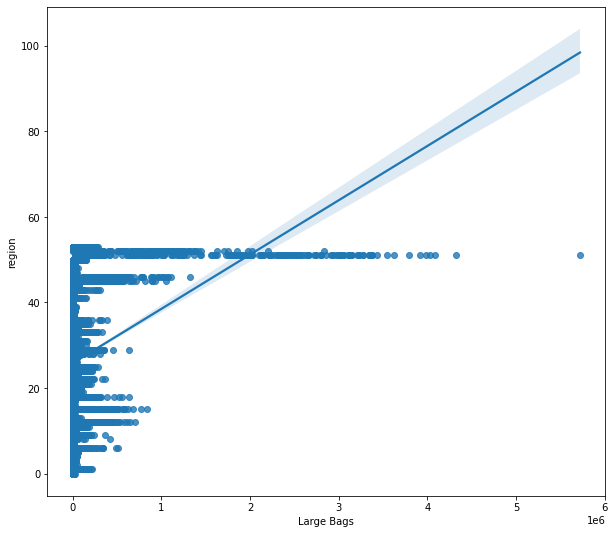

In [134]:
pplot(7)

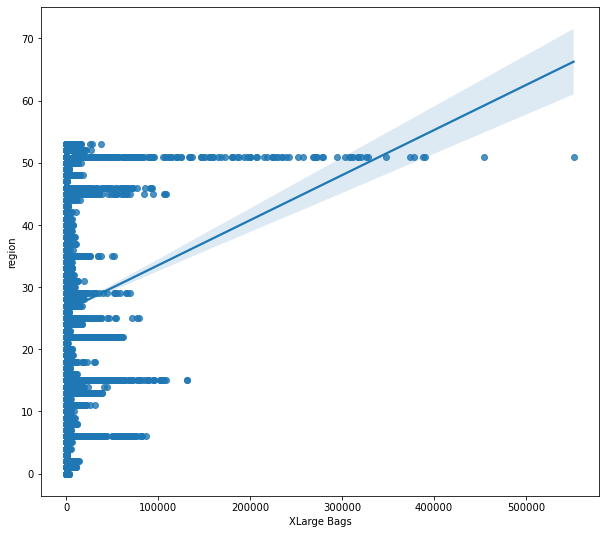

In [135]:
pplot(8)

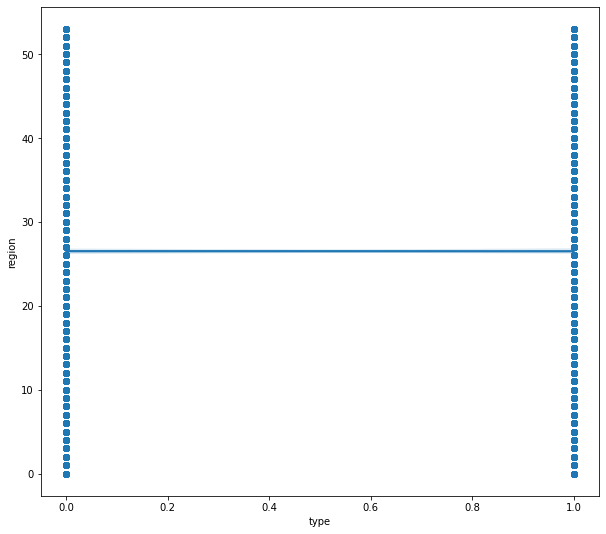

In [136]:
pplot(9)

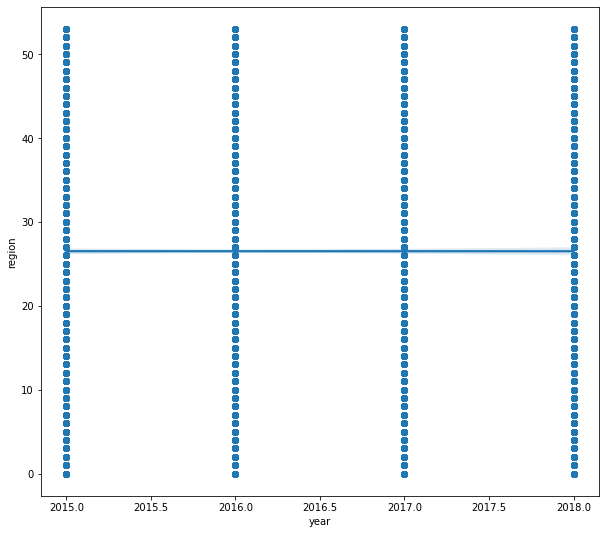

In [137]:
pplot(10)

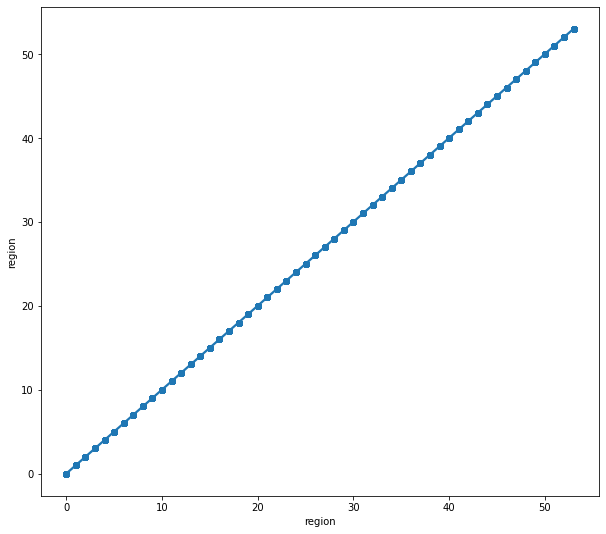

In [138]:
pplot(11)

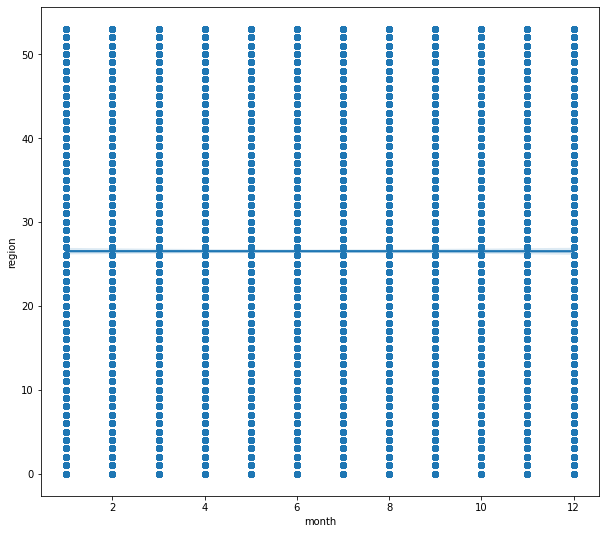

In [139]:
pplot(12)

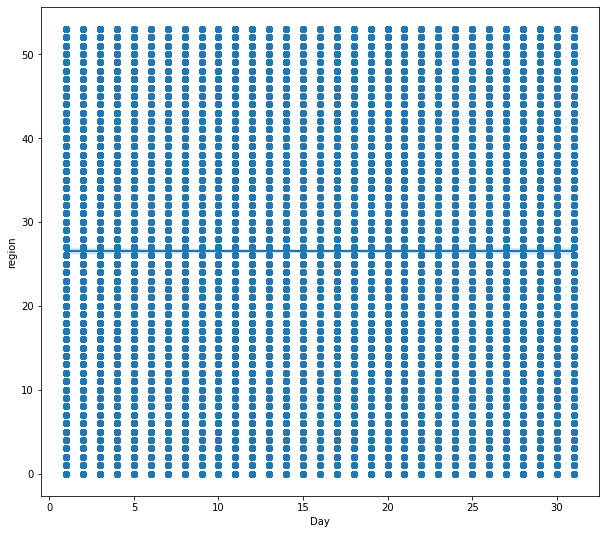

In [140]:
pplot(13)

0    9126
1    9123
Name: type, dtype: int64


<AxesSubplot:xlabel='type', ylabel='count'>

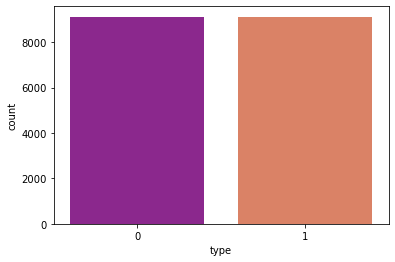

In [156]:
print(df['type'].value_counts())
sns.countplot(x='type',data=df,palette='plasma')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


<AxesSubplot:xlabel='year', ylabel='count'>

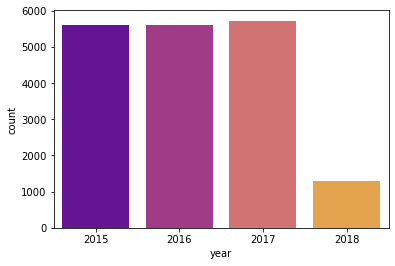

In [178]:
print(df['year'].value_counts())
sns.countplot(x='year',data=df,palette='plasma')

1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: month, dtype: int64


<AxesSubplot:xlabel='month', ylabel='count'>

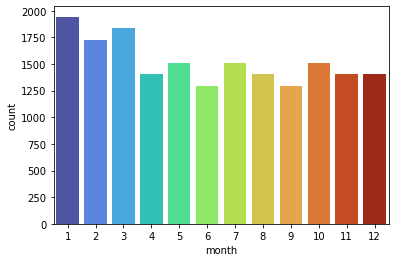

In [162]:
print(df['month'].value_counts())
sns.countplot(x='month',data=df,palette='turbo')

In [167]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'Day'],
      dtype='object')

4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: Day, dtype: int64


<AxesSubplot:xlabel='Day', ylabel='count'>

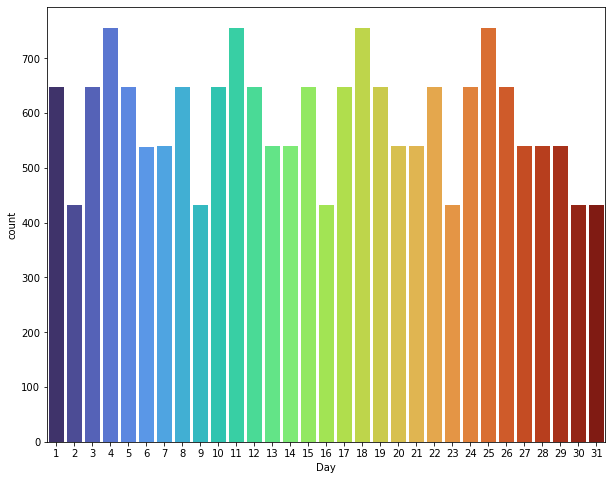

In [168]:
print(df['Day'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='Day',data=df,palette='turbo')

<Figure size 1080x720 with 0 Axes>

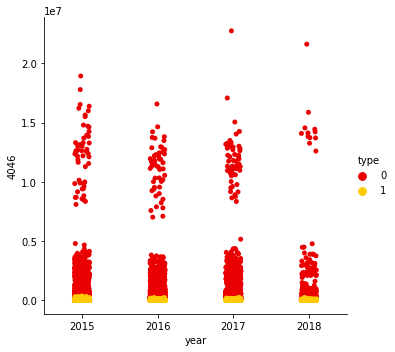

In [174]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="4046", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

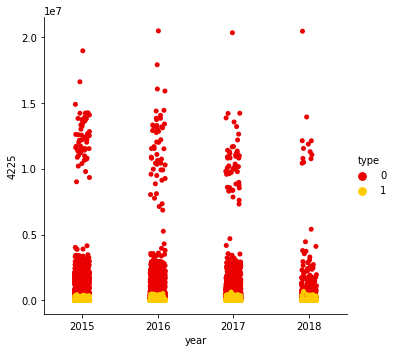

In [175]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="4225", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

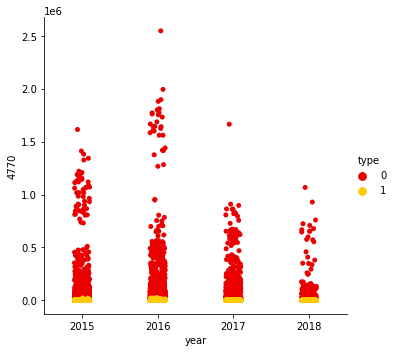

In [176]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="4770", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

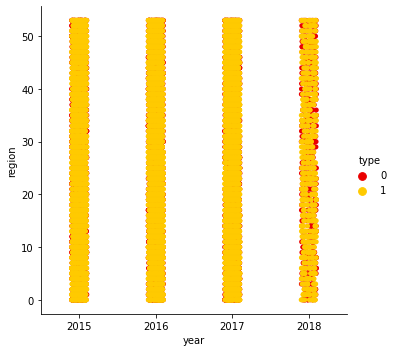

In [177]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="region", hue="type", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

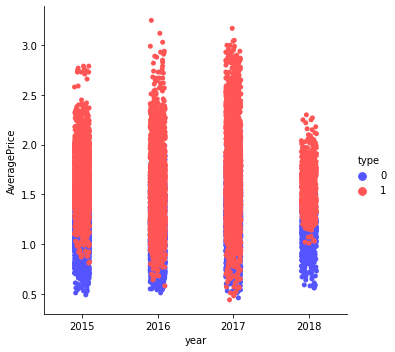

In [169]:
plt.figure(figsize=(15,10))
sns.catplot(x="year", y="AveragePrice", hue="type", data=df, palette="seismic")
plt.show()

with the help of this catplot we can see that how organic Average price more than conventional year after year

<Figure size 1080x720 with 0 Axes>

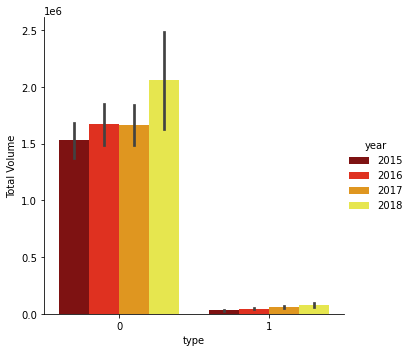

In [170]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Volume", hue="year", kind="bar", data=df, palette="hot")
plt.show()

<Figure size 1080x720 with 0 Axes>

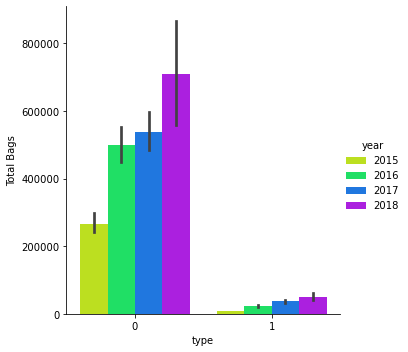

In [171]:
plt.figure(figsize=(15,10))
sns.catplot(x="type", y="Total Bags", hue="year", data=df, kind="bar", palette="hsv")
plt.show()

In [34]:
def dtp(a):
    plt.figure()
    sns.distplot(df[columns[a]],color='green',bins=8)

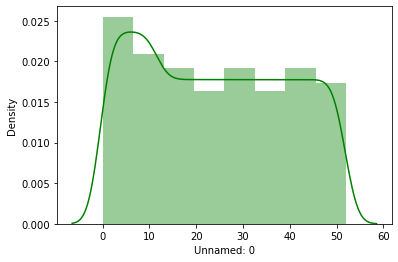

In [35]:
dtp(0)

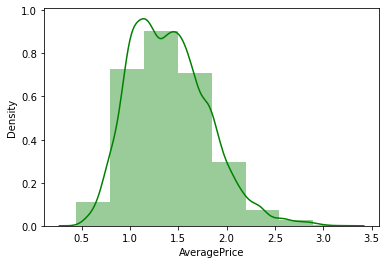

In [36]:
dtp(1)

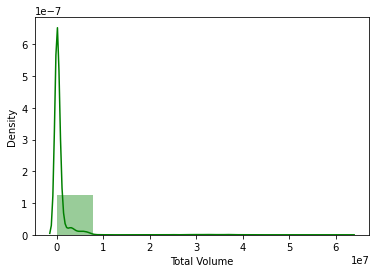

In [37]:
dtp(2)

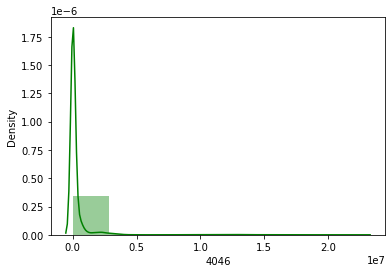

In [38]:
dtp(3)

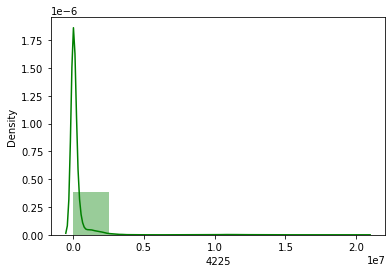

In [39]:
dtp(4)

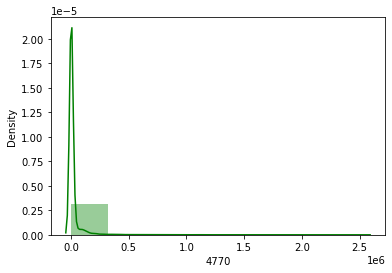

In [40]:
dtp(5)

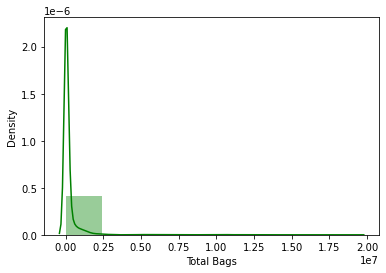

In [41]:
dtp(6)

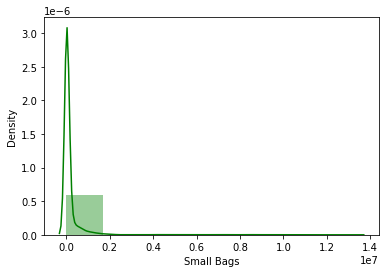

In [42]:
dtp(7)

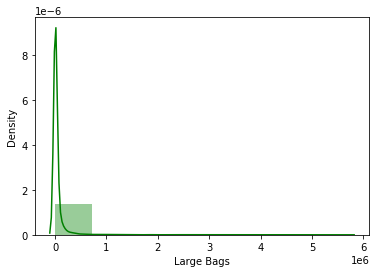

In [43]:
dtp(8)

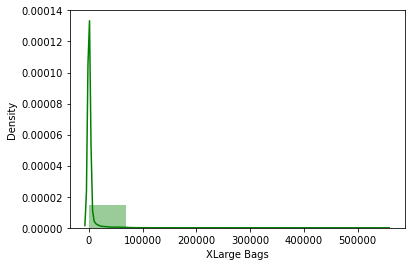

In [44]:
dtp(9)

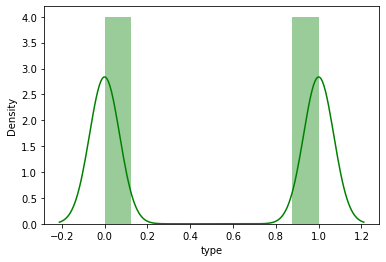

In [45]:
dtp(10)

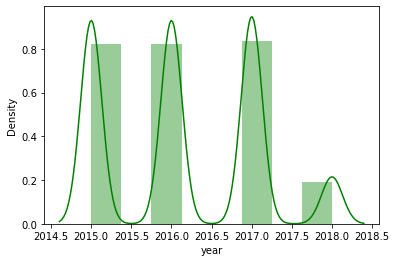

In [46]:
dtp(11)

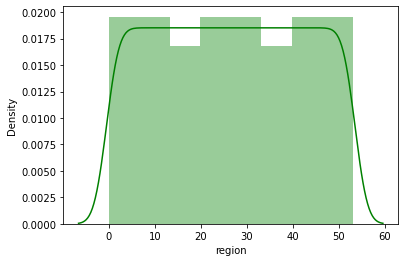

In [47]:
dtp(12)

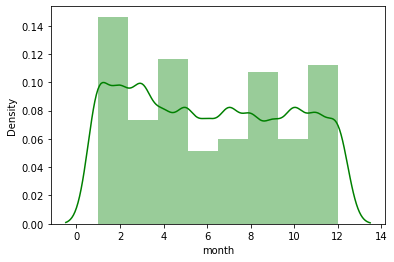

In [48]:
dtp(13)

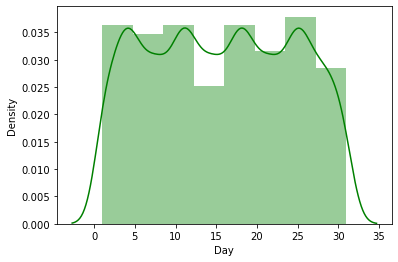

In [49]:
dtp(14)

<Figure size 4320x2160 with 0 Axes>

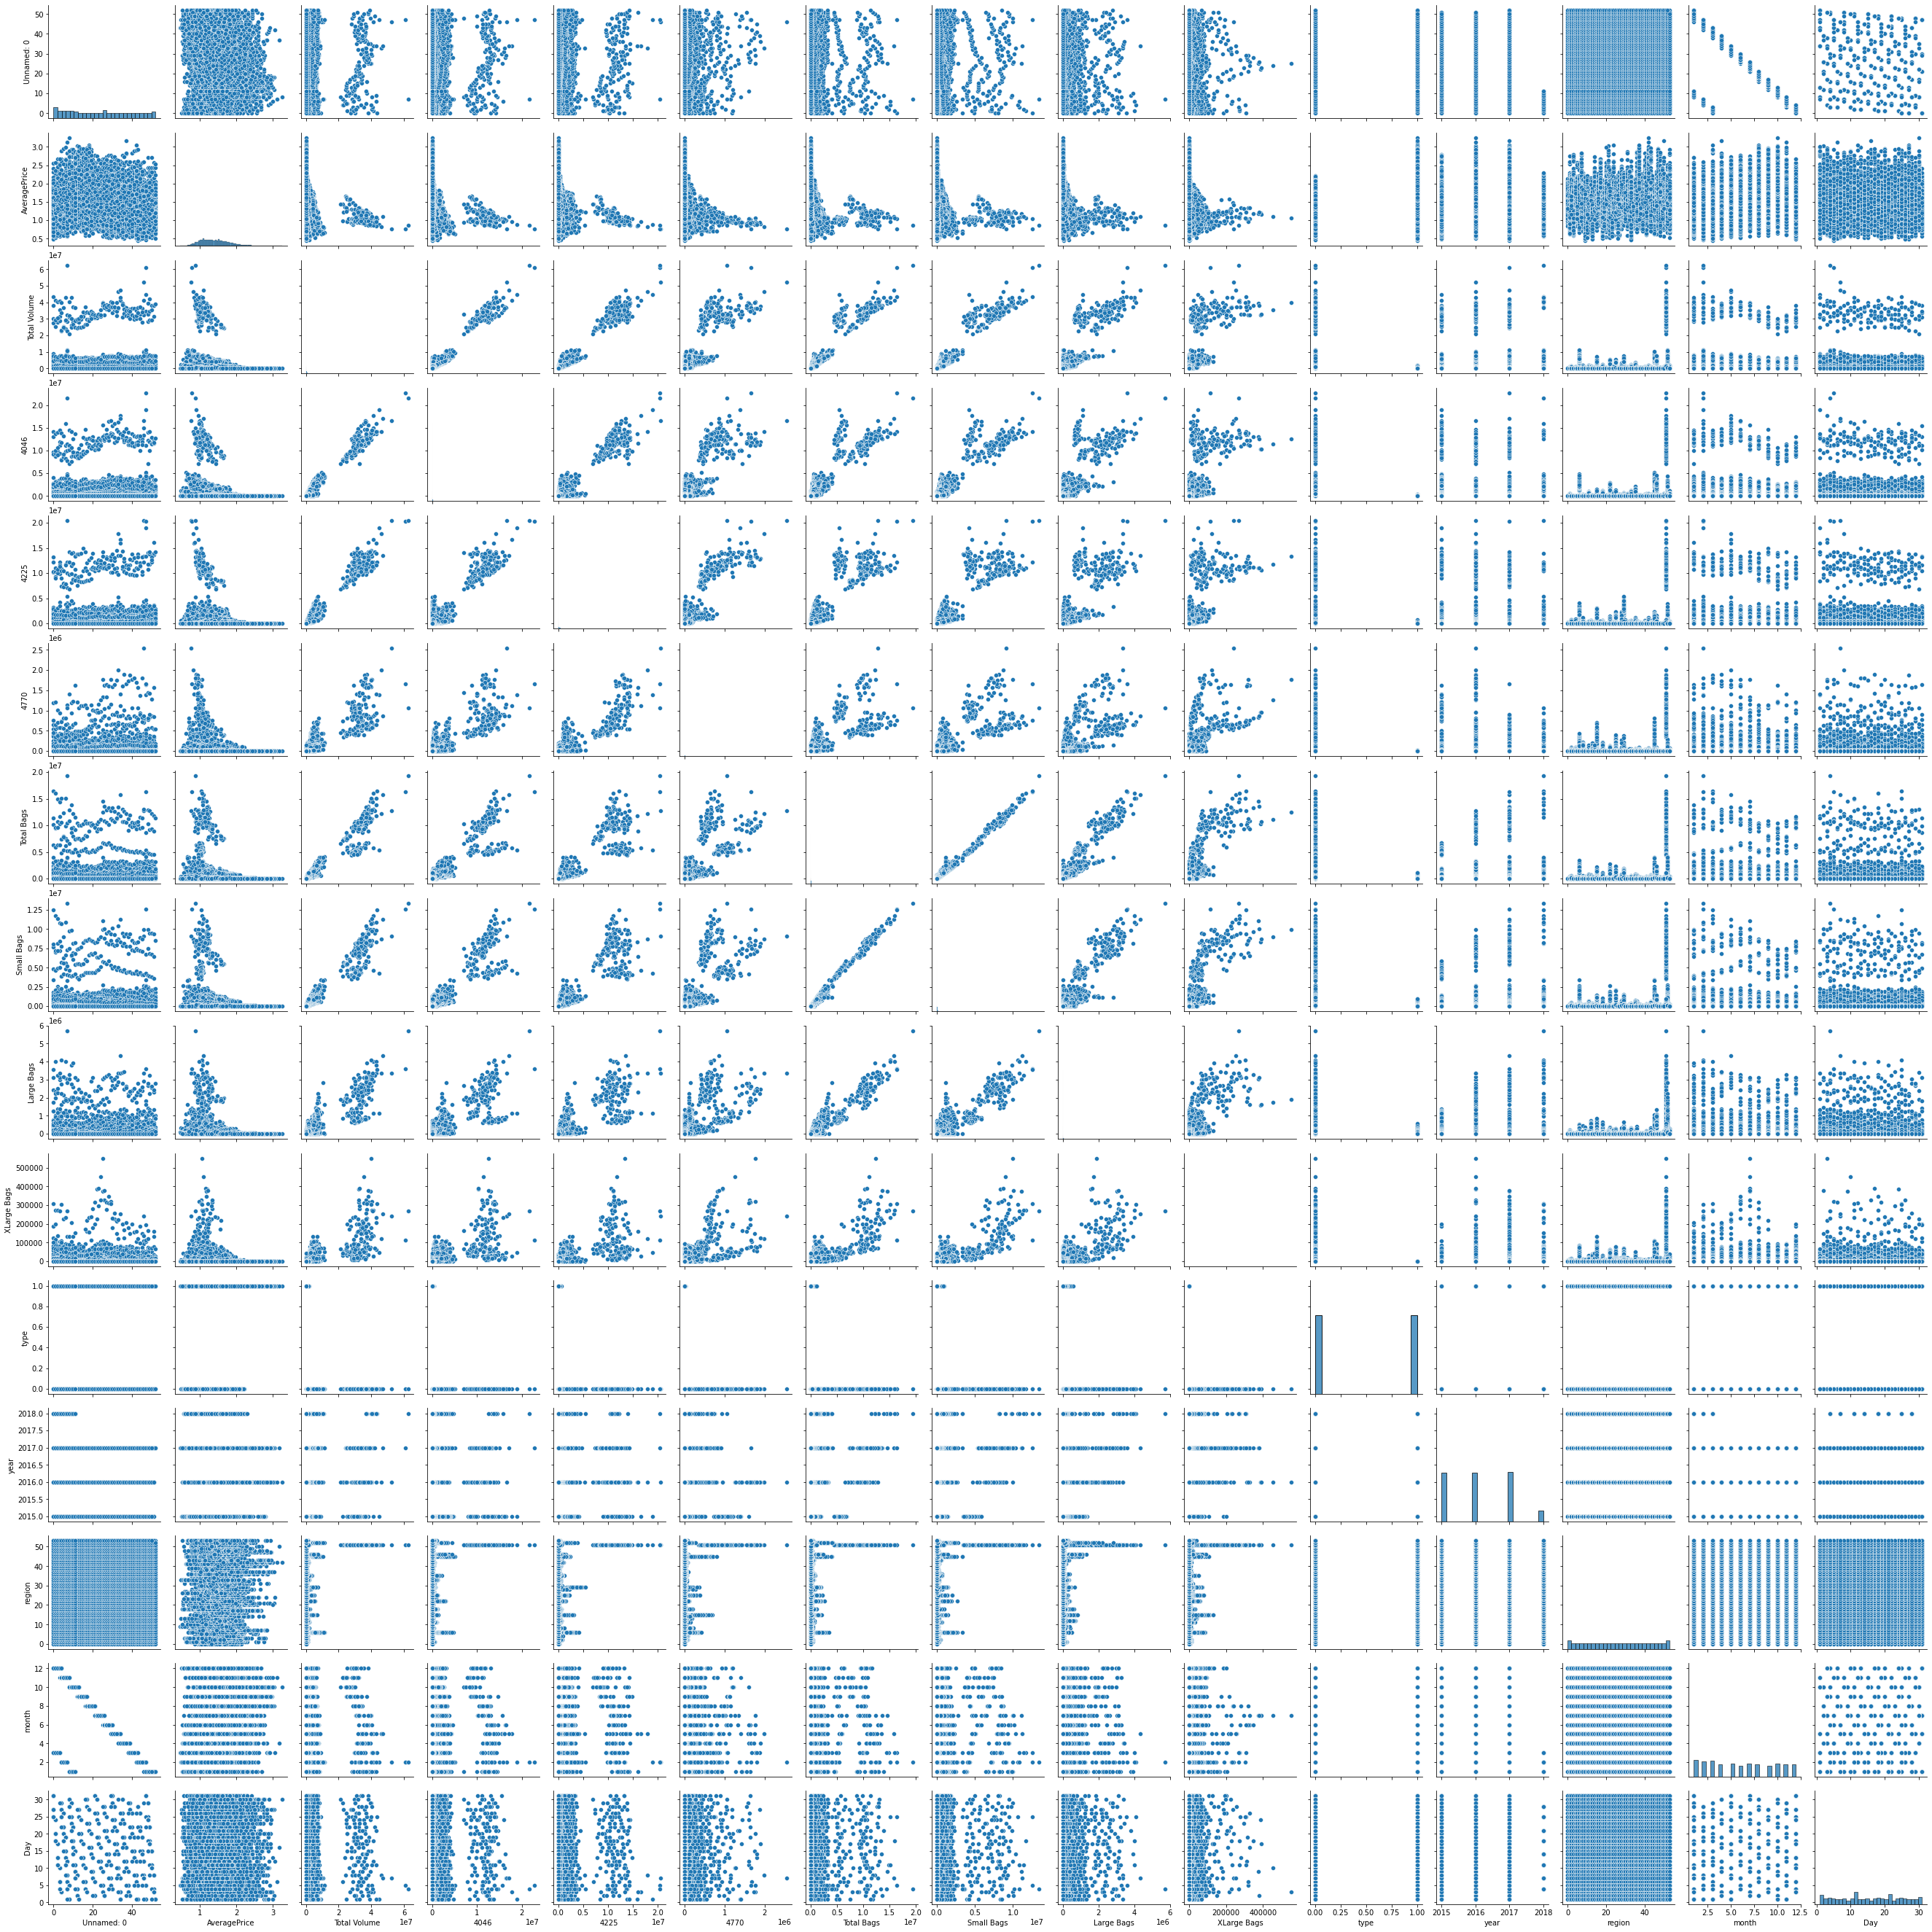

In [50]:
plt.figure(figsize=(60,30))
sns.pairplot(df)

# Detecting Outliers

lets visualise the outliers

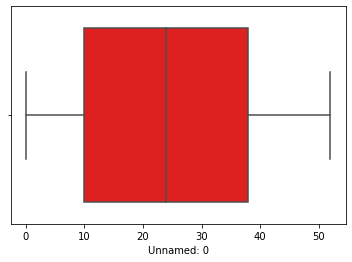

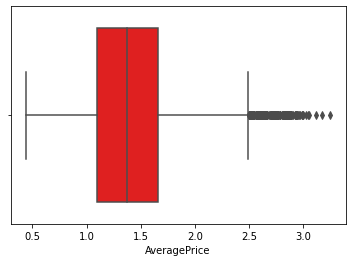

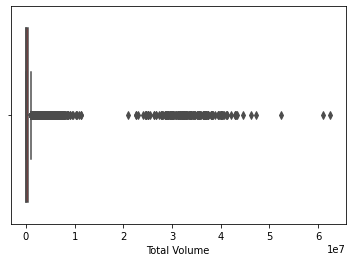

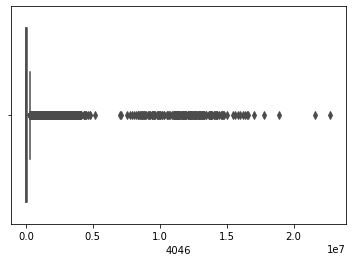

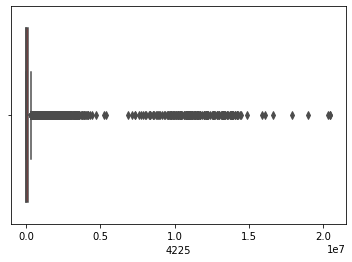

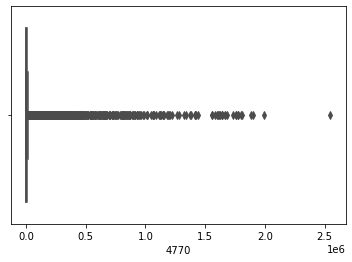

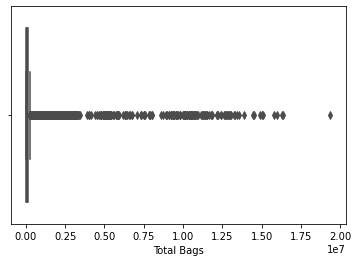

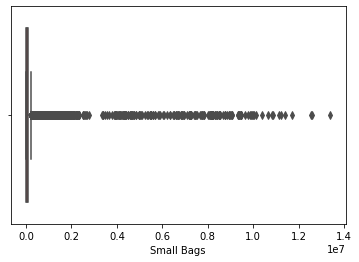

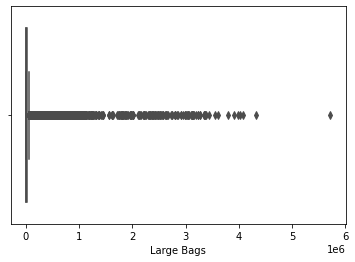

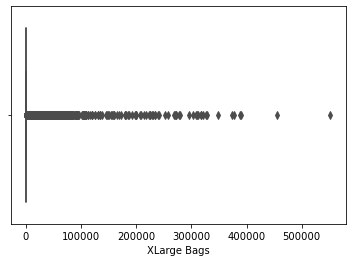

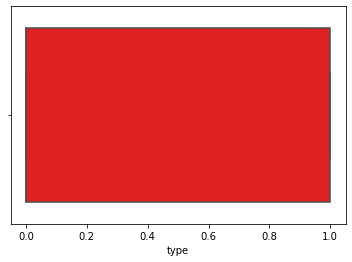

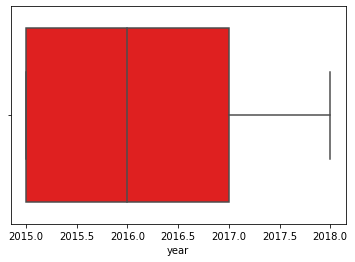

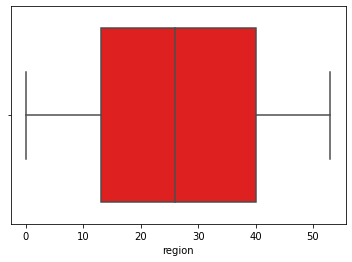

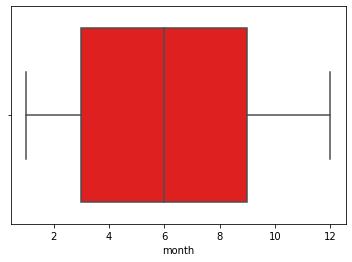

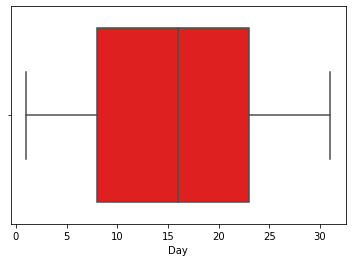

In [52]:
def bxplt(a):
    plt.figure()
    sns.boxplot(df[columns[a]],data=df,color='red')
    
for i in range(0,15):
    bxplt(i)

(18249, 14)

In [19]:
ncol=14
nrows=10

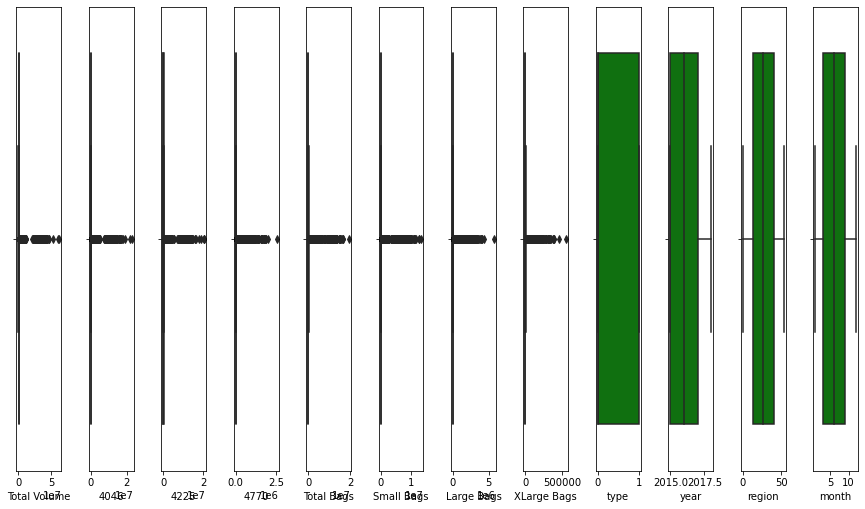

In [20]:
# to see outliers in a single visualization

plt.figure(figsize=(ncol,5*ncol))
for i in range(1,(len(columns)-1)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[columns[i]],color='green',orient='v')
    plt.tight_layout()

# Removing outliers

In [124]:
z=np.abs(zscore(df))
z

Unnamed: 0  AveragePrice  Total Volume      4046      4225      4770  \
0        1.565327      0.188689      0.227716  0.230816  0.199902  0.212091   
1        1.500730      0.139020      0.230427  0.231103  0.208054  0.211997   
2        1.436133      1.182069      0.212085  0.231007  0.154478  0.211325   
3        1.371536      0.809551      0.223444  0.230741  0.185350  0.211864   
4        1.306939      0.312861      0.231538  0.230891  0.208719  0.211834   
...           ...           ...           ...       ...       ...       ...   
18244    1.113149      0.556347      0.241373  0.230017  0.243857  0.212540   
18245    1.048552      0.755023      0.242296  0.230693  0.242277  0.212540   
18246    0.983955      1.152375      0.242331  0.230693  0.243090  0.205766   
18247    0.919358      1.301382      0.241625  0.230428  0.242651  0.205774   
18248    0.854761      0.531512      0.241253  0.229347  0.243170  0.210450   

       Total Bags  Small Bags  Large Bags  XLarge Bags      type      year  \
0        0.234170    0.232647    0.222352      0.17558  0.999836  1.221282   
1        0.233350    0.231568    0.222335      0.17558  0.999836  1.221282   
2        0.234730    0.233399    0.222311      0.17558  0.999836  1.221282   
3        0.237096    0.236568    0.222186      0.17558  0.999836  1.221282   
4        0.236718    0.236154    0.221924      0.17558  0.999836  1.221282   
...           ...         ...         ...          ...       ...       ...   
18244    0.229301    0.226665    0.220964      0.17558  1.000164  1.970504   
18245    0.233594    0.232196    0.221403      0.17558  1.000164  1.970504   
18246    0.233463    0.231644    0.222561      0.17558  1.000164  1.970504   
18247    0.231866    0.229543    0.222529      0.17558  1.000164  1.970504   
18248    0.230807    0.228111    0.222628      0.17558  1.000164  1.970504   

         region     month       Day  
0      1.700252  1.647632  1.291857  
1      1.700252  1.647632  0.494231  
2      1.700252  1.647632  0.303396  
3      1.700252  1.647632  1.101022  
4      1.700252  1.364669  1.519750  
...         ...       ...       ...  
18244  1.700811  1.181997  1.328915  
18245  1.700811  1.464959  1.405803  
18246  1.700811  1.464959  0.608177  
18247  1.700811  1.464959  0.189449  
18248  1.700811  1.464959  0.987075  

[18249 rows x 15 columns]

In [125]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([3, 3, 9, ..., 1, 1, 1], dtype=int64))


In [126]:
df_new1=df[(z<3).all(axis=1)]

In [127]:
df_new1.shape[0]

17651

In [128]:
#chcking data loss
data_loss=((df.shape[0]-df_new1.shape[0])/df.shape[0])*100
print(data_loss)

3.276891884486821


since data loss is less than 5% it is allowable and we can go with the dataset

In [129]:
#saving the upadated dataset 
df=df_new1

# Skewness Removal

In [130]:
#initialising x and y
X=df.drop(['region'],axis=1)
y=df.region

In [131]:
df.shape

(17651, 15)

In [132]:
X.skew().sort_values(ascending=False)

XLarge Bags     6.135607
4770            5.117170
Large Bags      5.053434
4046            4.909848
4225            4.455745
Small Bags      4.222706
Total Bags      4.066771
Total Volume    3.767138
AveragePrice    0.377432
year            0.229976
month           0.107408
Unnamed: 0      0.106116
Day             0.011778
type           -0.037741
dtype: float64

we are able to see skewness in the columns XLarge Bags,4770,Large Bags,4046,4225,Small Bags,Total Bags,Total Volume  

In [133]:
X['XLarge Bags']=PowerTransformer().fit_transform(X['XLarge Bags'].values.reshape(-1,1))
X['Large Bags']=PowerTransformer().fit_transform(X['Large Bags'].values.reshape(-1,1))
X['4046']=PowerTransformer().fit_transform(X['4046'].values.reshape(-1,1))
X['4225']=PowerTransformer().fit_transform(X['4225'].values.reshape(-1,1))
X['Small Bags']=PowerTransformer().fit_transform(X['Small Bags'].values.reshape(-1,1))
X['Total Bags']=PowerTransformer().fit_transform(X['Total Bags'].values.reshape(-1,1))
X['Total Volume']=PowerTransformer().fit_transform(X['Total Volume'].values.reshape(-1,1))
X['4770']=PowerTransformer().fit_transform(X['4770'].values.reshape(-1,1))


In [134]:
X.skew().sort_values(ascending=False)

XLarge Bags     0.853758
AveragePrice    0.377432
year            0.229976
month           0.107408
Unnamed: 0      0.106116
4770            0.024168
Day             0.011778
Total Volume   -0.008642
Total Bags     -0.022204
Small Bags     -0.024405
type           -0.037741
4046           -0.039282
4225           -0.044675
Large Bags     -0.110913
dtype: float64

Skewness is treated. It is in range -0.5 to 0.5 except XLarge Bags column . 

In [135]:
X['XLarge Bags']=np.sqrt(X['XLarge Bags'].values.reshape(-1,1))

In [136]:
X.skew().sort_values(ascending=False)

AveragePrice    0.377432
year            0.229976
month           0.107408
Unnamed: 0      0.106116
4770            0.024168
Day             0.011778
Total Volume   -0.008642
Total Bags     -0.022204
Small Bags     -0.024405
type           -0.037741
4046           -0.039282
4225           -0.044675
Large Bags     -0.110913
XLarge Bags    -2.492399
dtype: float64

In [137]:
X['XLarge Bags']=np.cbrt(X['XLarge Bags'].values.reshape(-1,1))

In [138]:
X.skew().sort_values(ascending=False)

AveragePrice    0.377432
year            0.229976
month           0.107408
Unnamed: 0      0.106116
4770            0.024168
Day             0.011778
Total Volume   -0.008642
Total Bags     -0.022204
Small Bags     -0.024405
type           -0.037741
4046           -0.039282
4225           -0.044675
Large Bags     -0.110913
XLarge Bags    -3.532746
dtype: float64

<AxesSubplot:xlabel='XLarge Bags', ylabel='Density'>

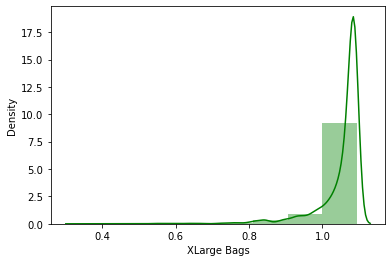

In [139]:
sns.distplot(X['XLarge Bags'],color='green',bins=8)

We are unable to reduce the skewness for 'XLarge Bags' so we have to drop that column

In [140]:
X.drop('XLarge Bags',axis=1,inplace=True)

In [141]:
X.skew().sort_values(ascending=False)

AveragePrice    0.377432
year            0.229976
month           0.107408
Unnamed: 0      0.106116
4770            0.024168
Day             0.011778
Total Volume   -0.008642
Total Bags     -0.022204
Small Bags     -0.024405
type           -0.037741
4046           -0.039282
4225           -0.044675
Large Bags     -0.110913
dtype: float64

# Feature selection

In [142]:
from sklearn.feature_selection import SelectKBest,f_classif

In [143]:
best_features = SelectKBest(score_func=f_classif ,k=9)

fit = best_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns =pd.DataFrame(X.columns)
#concatenate dataframes

features_scores =pd.concat([df_columns,df_scores],axis=1 )
features_scores

0           0
0     Unnamed: 0    0.037343
1   AveragePrice   66.703681
2   Total Volume  117.862821
3           4046  180.496551
4           4225  142.465197
5           4770   83.735973
6     Total Bags  129.107307
7     Small Bags  127.162536
8     Large Bags  156.862958
9           type    4.399338
10          year    0.382588
11         month    0.137242
12           Day    0.022878

In [144]:
features_scores.columns = ['Feature_Name','Score']  #Name o/p col
print(features_scores.nlargest(9,'Score'))

   Feature_Name       Score
3          4046  180.496551
8    Large Bags  156.862958
4          4225  142.465197
6    Total Bags  129.107307
7    Small Bags  127.162536
2  Total Volume  117.862821
5          4770   83.735973
1  AveragePrice   66.703681
9          type    4.399338


# scaling the dataset 

In [145]:
scaler=StandardScaler()

<AxesSubplot:>

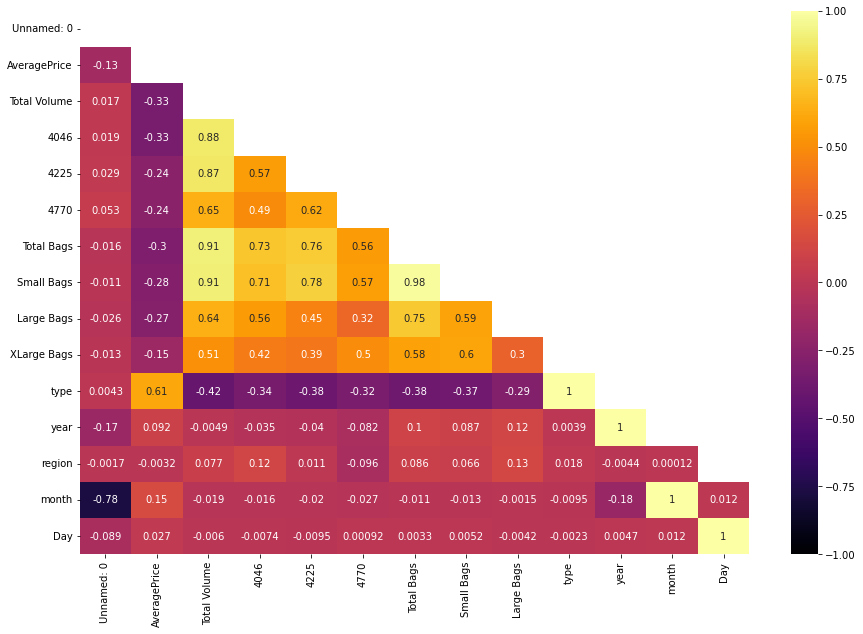

In [146]:
D=df.corr().drop(['XLarge Bags','region'],axis=1)
upper_triangle = np.triu(D)
plt.figure(figsize=(15,10))
sns.heatmap(D , vmin=-1, vmax=1, annot=True,cmap="inferno", mask=upper_triangle)

In [147]:
X=X[['AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'type']]

In [148]:
X.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'type'],
      dtype='object')

In [149]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)

vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

vif      features
0   1.977154  AveragePrice
1  54.558838  Total Volume
2   6.788267          4046
3  12.128133          4225
4   3.751363          4770
5  34.665902    Total Bags
6  17.264340    Small Bags
7   3.433931    Large Bags
8   3.722275          type

we are able to see Total Volume,Total Bags,Small Bags,4225 having vif greater than 10 so we need to drop it iteratively.see thye values

In [150]:
X.drop('Total Volume',axis=1,inplace=True)

In [151]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

vif      features
0   1.916327  AveragePrice
1   3.506746          4046
2   4.381248          4225
3   3.738072          4770
4  25.549618    Total Bags
5  17.255112    Small Bags
6   3.377765    Large Bags
7   3.623696          type

In [152]:
X.drop('Total Bags',axis=1,inplace=True)

In [153]:
X_scaled=scaler.fit_transform(X)
X=pd.DataFrame(X_scaled,columns=X.columns)
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X.shape[1])]
vif['features']=X.columns
vif

vif      features
0  1.808388  AveragePrice
1  3.506068          4046
2  4.183895          4225
3  3.733877          4770
4  3.516101    Small Bags
5  1.853193    Large Bags
6  3.609364          type

No multicollinearity now. Removed all the multicollinear columns. Now we can fit the datas to model and check score

# Model Building

In [86]:
#X,y already initialized
X.shape

(17651, 7)

In [87]:
y.shape

(17651,)

In [154]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score


In [156]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=i)
    rf=RandomForestClassifier(n_estimators=100)
    rf.fit(x_train,y_train)
    
    predrf=rf.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

Best accuracy is  0.9039202356673465  on random_state  50


In [157]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=50)

In [158]:
#shapes of x and y (train,test)
x_train.shape

(13238, 7)

In [159]:
#shape of test features
x_test.shape

(4413, 7)

In [160]:
#shape of train features
y_train.shape

(13238,)

In [161]:
#shape of test label
y_test.shape

(4413,)

In [172]:
# different algorithm going to use


knn=KNeighborsClassifier()
sv=SVC()
dtc=DecisionTreeClassifier()
rf=RandomForestClassifier(n_estimators=100)
gd=GradientBoostingClassifier()
xgb=XGBClassifier()

In [163]:
#code for Training and Prediction 

def evaluate(x):
    model=x
    print(model)
    #training the model
    model.fit(x_train,y_train)
    pred_train=model.predict(x_train)
    #model prediction
    pred=model.predict(x_test)
    print("train accuracy score is {:.2f}%".format(accuracy_score(y_train,pred_train)*100))
    print("test accuracy score is {:.2f}%".format(accuracy_score(y_test,pred)*100))
    
    print("Confusion Matrix : \n",confusion_matrix(y_test,pred))
    print("\n")
    print("Classification Report  : \n",classification_report(y_test,pred))

In [166]:
#calling KNeighborsClassifier model
evaluate(knn)

KNeighborsClassifier()
train accuracy score is 90.30%
test accuracy score is 85.47%
Confusion Matrix : 
 [[61  0  0 ...  0  0  0]
 [ 0 57  0 ...  0  0  0]
 [ 0  0 77 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 60  0]
 [ 0  0  0 ...  0  0 51]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81        79
           1       0.75      0.72      0.74        79
           2       0.97      0.97      0.97        79
           3       0.83      0.77      0.80        82
           4       0.93      0.93      0.93        88
           5       0.82      0.80      0.81        76
           6       0.96      0.97      0.96        68
           7       0.82      0.88      0.85        81
           8       0.99      0.99      0.99        92
           9       0.79      0.84      0.82        82
          10       0.76      0.79      0.78        87
          11       0.85      0.94      0.89        98
       

In [101]:
#calling DecisionTreeClassifier model
evaluate(dtc)

DecisionTreeClassifier()
train accuracy score is 100.00%
test accuracy score is 79.07%
Confusion Matrix : 
 [[45  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  2]
 [ 0  0 51 ...  0  0  2]
 ...
 [ 0  0  0 ... 43  0  0]
 [ 0  0  0 ...  0 46  0]
 [ 0  0  1 ...  0  0 33]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.79      0.74      0.76        61
           1       0.66      0.70      0.68        63
           2       0.89      0.85      0.87        60
           3       0.72      0.78      0.75        63
           4       0.82      0.74      0.78        73
           5       0.72      0.74      0.73        66
           6       0.96      0.96      0.96        54
           7       0.80      0.85      0.83        67
           8       0.96      0.96      0.96        78
           9       0.76      0.78      0.77        68
          10       0.71      0.78      0.74        63
          11       0.88      0.87      0.88        85
    

In [167]:
#calling SVC model
evaluate(sv)

SVC()
train accuracy score is 78.53%
test accuracy score is 78.06%
Confusion Matrix : 
 [[69  0  0 ...  0  0  0]
 [ 0 48  0 ...  0  0  0]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 63  0]
 [ 0  0  1 ...  0  0 46]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.68      0.87      0.76        79
           1       0.49      0.61      0.55        79
           2       0.96      0.95      0.96        79
           3       0.84      0.74      0.79        82
           4       0.87      0.81      0.84        88
           5       0.80      0.63      0.71        76
           6       0.96      0.97      0.96        68
           7       0.77      0.69      0.73        81
           8       1.00      0.99      0.99        92
           9       0.68      0.83      0.75        82
          10       0.65      0.76      0.70        87
          11       0.85      0.83      0.84        98
          12       0.86 

In [169]:
#calling RandomForestClassifier model
evaluate(rf)

RandomForestClassifier()
train accuracy score is 100.00%
test accuracy score is 90.14%
Confusion Matrix : 
 [[65  0  0 ...  0  0  0]
 [ 0 66  0 ...  0  0  0]
 [ 0  0 78 ...  0  0  0]
 ...
 [ 0  0  0 ... 52  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  0 ...  0  0 58]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        79
           1       0.85      0.84      0.84        79
           2       0.99      0.99      0.99        79
           3       0.93      0.82      0.87        82
           4       0.93      0.97      0.95        88
           5       0.86      0.84      0.85        76
           6       0.97      1.00      0.99        68
           7       0.89      0.86      0.87        81
           8       1.00      0.99      0.99        92
           9       0.88      0.91      0.90        82
          10       0.85      0.92      0.88        87
          11       0.92      0.94      0.93        98
    

In [171]:
from xgboost import XGBClassifier

In [170]:
#calling GradientBoostingClassifier
evaluate(gd)

GradientBoostingClassifier()
train accuracy score is 97.31%
test accuracy score is 81.78%
Confusion Matrix : 
 [[60  0  0 ...  0  0  0]
 [ 0 58  0 ...  0  0  1]
 [ 0  0 75 ...  0  0  0]
 ...
 [ 0  0  0 ... 49  3  0]
 [ 0  0  0 ...  0 57  0]
 [ 0  0  0 ...  0  0 50]]


Classification Report  : 
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        79
           1       0.70      0.73      0.72        79
           2       0.96      0.95      0.96        79
           3       0.79      0.70      0.74        82
           4       0.86      0.85      0.86        88
           5       0.80      0.70      0.75        76
           6       0.94      0.91      0.93        68
           7       0.77      0.79      0.78        81
           8       0.98      0.97      0.97        92
           9       0.84      0.85      0.85        82
          10       0.74      0.78      0.76        87
          11       0.84      0.92      0.88        98
 

In [173]:
#calling RandomForestClassifier model
evaluate(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
train accuracy score is 100.00%
test accuracy score is 86.92%
Confusion Matrix : 
 [[64  0  0 ...  0  0  0]
 [ 0 62  0 ...  0  0  1]
 [ 0  0 77 ...  0  0  1]
 ...
 [ 0  0  0 ... 49  0  0]
 [ 0  0  0 ...  0 62  0]
 [ 0  0  0 ...  0  0 55]]


Classification Rep

In [175]:
model=[knn,sv,rf,dtc,gd,xgb]

for m in model:
    score=cross_val_score(m,X,y,cv=5)
    print(m,"Cross val score is ",score*100,"   ")
    print("mean is ",score.mean()*100,"\n\n")

KNeighborsClassifier() Cross val score is  [64.5143019  73.79603399 69.63172805 58.24362606 43.20113314]    
mean is  61.87736462878768 


SVC() Cross val score is  [63.52308128 76.14730878 66.74220963 62.20963173 44.98583569]    
mean is  62.72161342315693 


RandomForestClassifier() Cross val score is  [66.0719343  81.50141643 75.35410765 69.2917847  49.2917847 ]    
mean is  68.30220555613053 


DecisionTreeClassifier() Cross val score is  [49.36278675 68.92351275 63.88101983 54.70254958 43.05949008]    
mean is  55.98587179678493 


GradientBoostingClassifier() Cross val score is  [52.76125743 75.29745042 69.94334278 62.46458924 40.56657224]    
mean is  60.206642421675106 


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_ty

# Hyper parameter tuning

In [ ]:
we will try to improve accuracy by hypertuning

# AUC_ROC CURVE

In [ ]:
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import plot_roc_curve 

In [ ]:
#lets see how well our model works on train data

model=[lg,gnb,knn,sv,rf,DTC,ada]
for m in model:
    ax=m.fit(x_train,y_train)
    plot_roc_curve(ax,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plt.show()

In [ ]:
#lets see how well our model works on test data

model=[lg,gnb,knn,sv,rf,DTC,ada]
for m in model:
    plot_roc_curve(m,x_test,y_test)
    plt.title('Receiver operating Characteristics')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

In [ ]:
#saving the model
joblib.dump(,"avacodo_Dataset.obj")

In [ ]:
#Lets Check loading the file 

avacodo_reg_prediction=joblib.load("avacodo_Dataset.obj")

In [ ]:
pred=.predict(x_test)
Conclusion=pd.DataFrame([avacodo_reg_prediction.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

In [ ]:
Model Created Succesfully for classifcation now lets do it for regression approach

# To find the Average price in the dataset .

the target column here is Average price

In [ ]:
def reg_plot(i):
    plt.figure(figsize=(10,9))
    sns.regplot(x=columns[i],y='region',data=df)    
    plt.xlabel(columns[i])
    plt.show()

In [ ]:
reg_plot(0)

In [ ]:
reg_plot(1)

In [ ]:
reg_plot(2)

In [ ]:
reg_plot(3)

In [ ]:
reg_plot(4)

In [ ]:
reg_plot(5)

In [ ]:
reg_plot(6)

In [ ]:
reg_plot(7)

In [ ]:
reg_plot(8)

In [ ]:
reg_plot(9)

In [ ]:
reg_plot(10)

In [ ]:
reg_plot(11)

In [ ]:
reg_plot(12)

In [ ]:
#initialising x and y
X=df.drop(['AveragePrice'],axis=1)
y=df.AveragePrice

In [ ]:
#finding best random_state

maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    r2=r2_score(y_test,predrf)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best accuracy is ",maxAccu," on random_state ",maxRS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=193)

In [ ]:
#shapes of x and y (train,test)
x_train.shape

In [ ]:
#shape of test features
x_test.shape

In [ ]:
#shape of train features
y_train.shape

In [ ]:
#shape of test label
y_test.shape

In [ ]:
# different algorithm going to use

lr=LinearRegression()
ls=Lasso()
Rd=Ridge()
dtr=DecisionTreeRegressor()
rfr=RandomForestRegressor(n_estimators=100)
adr=AdaBoostRegressor(n_estimators=100)
knn=KNeighborsRegressor()
gbr=GradientBoostingRegressor()

In [ ]:
#code for Training and Prediction for linear,lasso,Ridge regression
def evaluate(x):
    mod=x
    mod.fit(x_train,y_train)
    pred_train=mod.predict(x_train)
    pred_test=mod.predict(x_test)
    

    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100),"\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred_test)*100),"\n")
    print("intercept is : ",mod.intercept_,"\n")
    print("Coefficient is  : ",mod.coef_,"\n")
    print("Score of trained data :",mod.score(x_train,y_train)*100,"\n")
    print("Score of test data :",mod.score(x_test,y_test)*100,"\n")
    
    print("Error")
    print("mean absolute error is : ",mean_absolute_error(y_test,pred_test))
    print("mean squared error is: ",mean_squared_error(y_test,pred_test))
    print("root mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred_test)))
    plt.scatter(x=y_test,y=pred_test,color='r')
    plt.plot(y_test,y_test,color='b')

In [ ]:
#code for Training and Prediction for other models

def eval(x):
    mod=x
    print(mod)
    #training the data
    mod.fit(x_train,y_train)
    #Predicting the data
    pred_train=mod.predict(x_train)
    pred=mod.predict(x_test)
    
    print("r2_score for train data is {:.2f}%".format(r2_score(y_train,pred_train)*100))
    print("\n")
    print("r2_score for  test data is  {:.2f}%".format(r2_score(y_test,pred)*100))
    
    print("\n")
    print("Error")
    print("mean absolute error : ",mean_absolute_error(y_test,pred))
    print("mean squared error : ",mean_squared_error(y_test,pred))
    print("mean squared error is: ",np.sqrt(mean_squared_error(y_test,pred)))
    plt.scatter(x=y_test,y=pred,color='r')
    plt.plot(y_test,y_test,color='b')
    
   

In [ ]:
#calling Ridge model
evaluate(lr)

In [ ]:
#calling Ridge model
evaluate(Rd)

In [ ]:
#calling Lasso model
evaluate(ls)

In [ ]:
#calling DecisionTreeRegressor model
eval(dtr)

In [ ]:
# RandomForestRegressor model
eval(rfr)

In [ ]:
#calling AdaBoostRegressor model
eval(adr) 

In [ ]:
#calling KNeighborsRegressor model
eval(knn)

In [ ]:
#calling GradientBoostingRegressor model
eval(gbr)

In [ ]:
from numpy import absolute
model=[lr,dtr,rfr,adr,knn,gbr,ls,Rd]
for m in model:
    score=cross_val_score(m,X,y,cv=5,scoring="r2")
    print(m,"Cross val score is ",score*100)
    score=absolute(score)
    print("mean is ",score.mean()*100,"\n\n")

In [ ]:
#saving the model
joblib.dump(h_Rd,"Baseball_Case_Study.obj")

In [ ]:
#Lets Check loading the file 

No_of_predicted_wins=joblib.load("Baseball_Case_Study.obj")

In [ ]:
#predicting 
No_of_predicted_wins.score(x_test,y_test)*100


In [ ]:
pred=h_Rd.predict(x_test)
Conclusion=pd.DataFrame([No_of_predicted_wins.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion